In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Copy Contents**

In [ ]:
!cp -av '/content/drive/MyDrive/yolov8s.pt' '/content/'

'/content/drive/MyDrive/yolov8s.pt' -> '/content/yolov8s.pt'


In [ ]:
!cp -av '/content/drive/MyDrive/datasets' '/content/'

Streaming output truncated to the last 5000 lines.
'/content/drive/MyDrive/datasets/train/labels/614.txt' -> '/content/datasets/train/labels/614.txt'
'/content/drive/MyDrive/datasets/train/labels/6406.txt' -> '/content/datasets/train/labels/6406.txt'
'/content/drive/MyDrive/datasets/train/labels/2101.txt' -> '/content/datasets/train/labels/2101.txt'
'/content/drive/MyDrive/datasets/train/labels/2680.txt' -> '/content/datasets/train/labels/2680.txt'
'/content/drive/MyDrive/datasets/train/labels/3555.txt' -> '/content/datasets/train/labels/3555.txt'
'/content/drive/MyDrive/datasets/train/labels/2690.txt' -> '/content/datasets/train/labels/2690.txt'
'/content/drive/MyDrive/datasets/train/labels/3580.txt' -> '/content/datasets/train/labels/3580.txt'
'/content/drive/MyDrive/datasets/train/labels/6551.txt' -> '/content/datasets/train/labels/6551.txt'
'/content/drive/MyDrive/datasets/train/labels/1955.txt' -> '/content/datasets/train/labels/1955.txt'
'/content/drive/MyDrive/datasets/train/lab

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!nvidia-smi

Tue Dec  5 18:04:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.cuda.get_device_name(0)
    print(f"GPU: {device}")
else:
    print("No GPU available.")


GPU: Tesla T4


In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
import torch
print(torch.version.cuda)
torch.cuda.is_available()

11.8


True

In [ ]:
!yolo task=detect mode=train model=/content/yolov8s.pt data=/content/datasets/data.yaml epochs=2 imgsz=640 batch=8

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/yolov8s.pt, data=/content/datasets/data.yaml, epochs=2, patience=50, batch=8, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None

In [ ]:
from tabulate import tabulate
import csv

csv_file_path = '/content/runs/detect/train2/results.csv'

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    data = list(csv_reader)

# Display data in a tabular format
print(tabulate(data, headers=header, tablefmt='grid'))

+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+
|                     epoch |            train/box_loss |            train/cls_loss |            train/dfl_loss |      metrics/precision(B) |         metrics/recall(B) |          metrics/mAP50(B) |       metrics/mAP50-95(B) |              val/box_loss |              val/cls_loss |              val/dfl_loss |                    lr/pg0 |                    lr/pg1 |                    lr/pg2 |
+===========================+===========================+===========================+===========================+===========================+===========================+===========================+===============

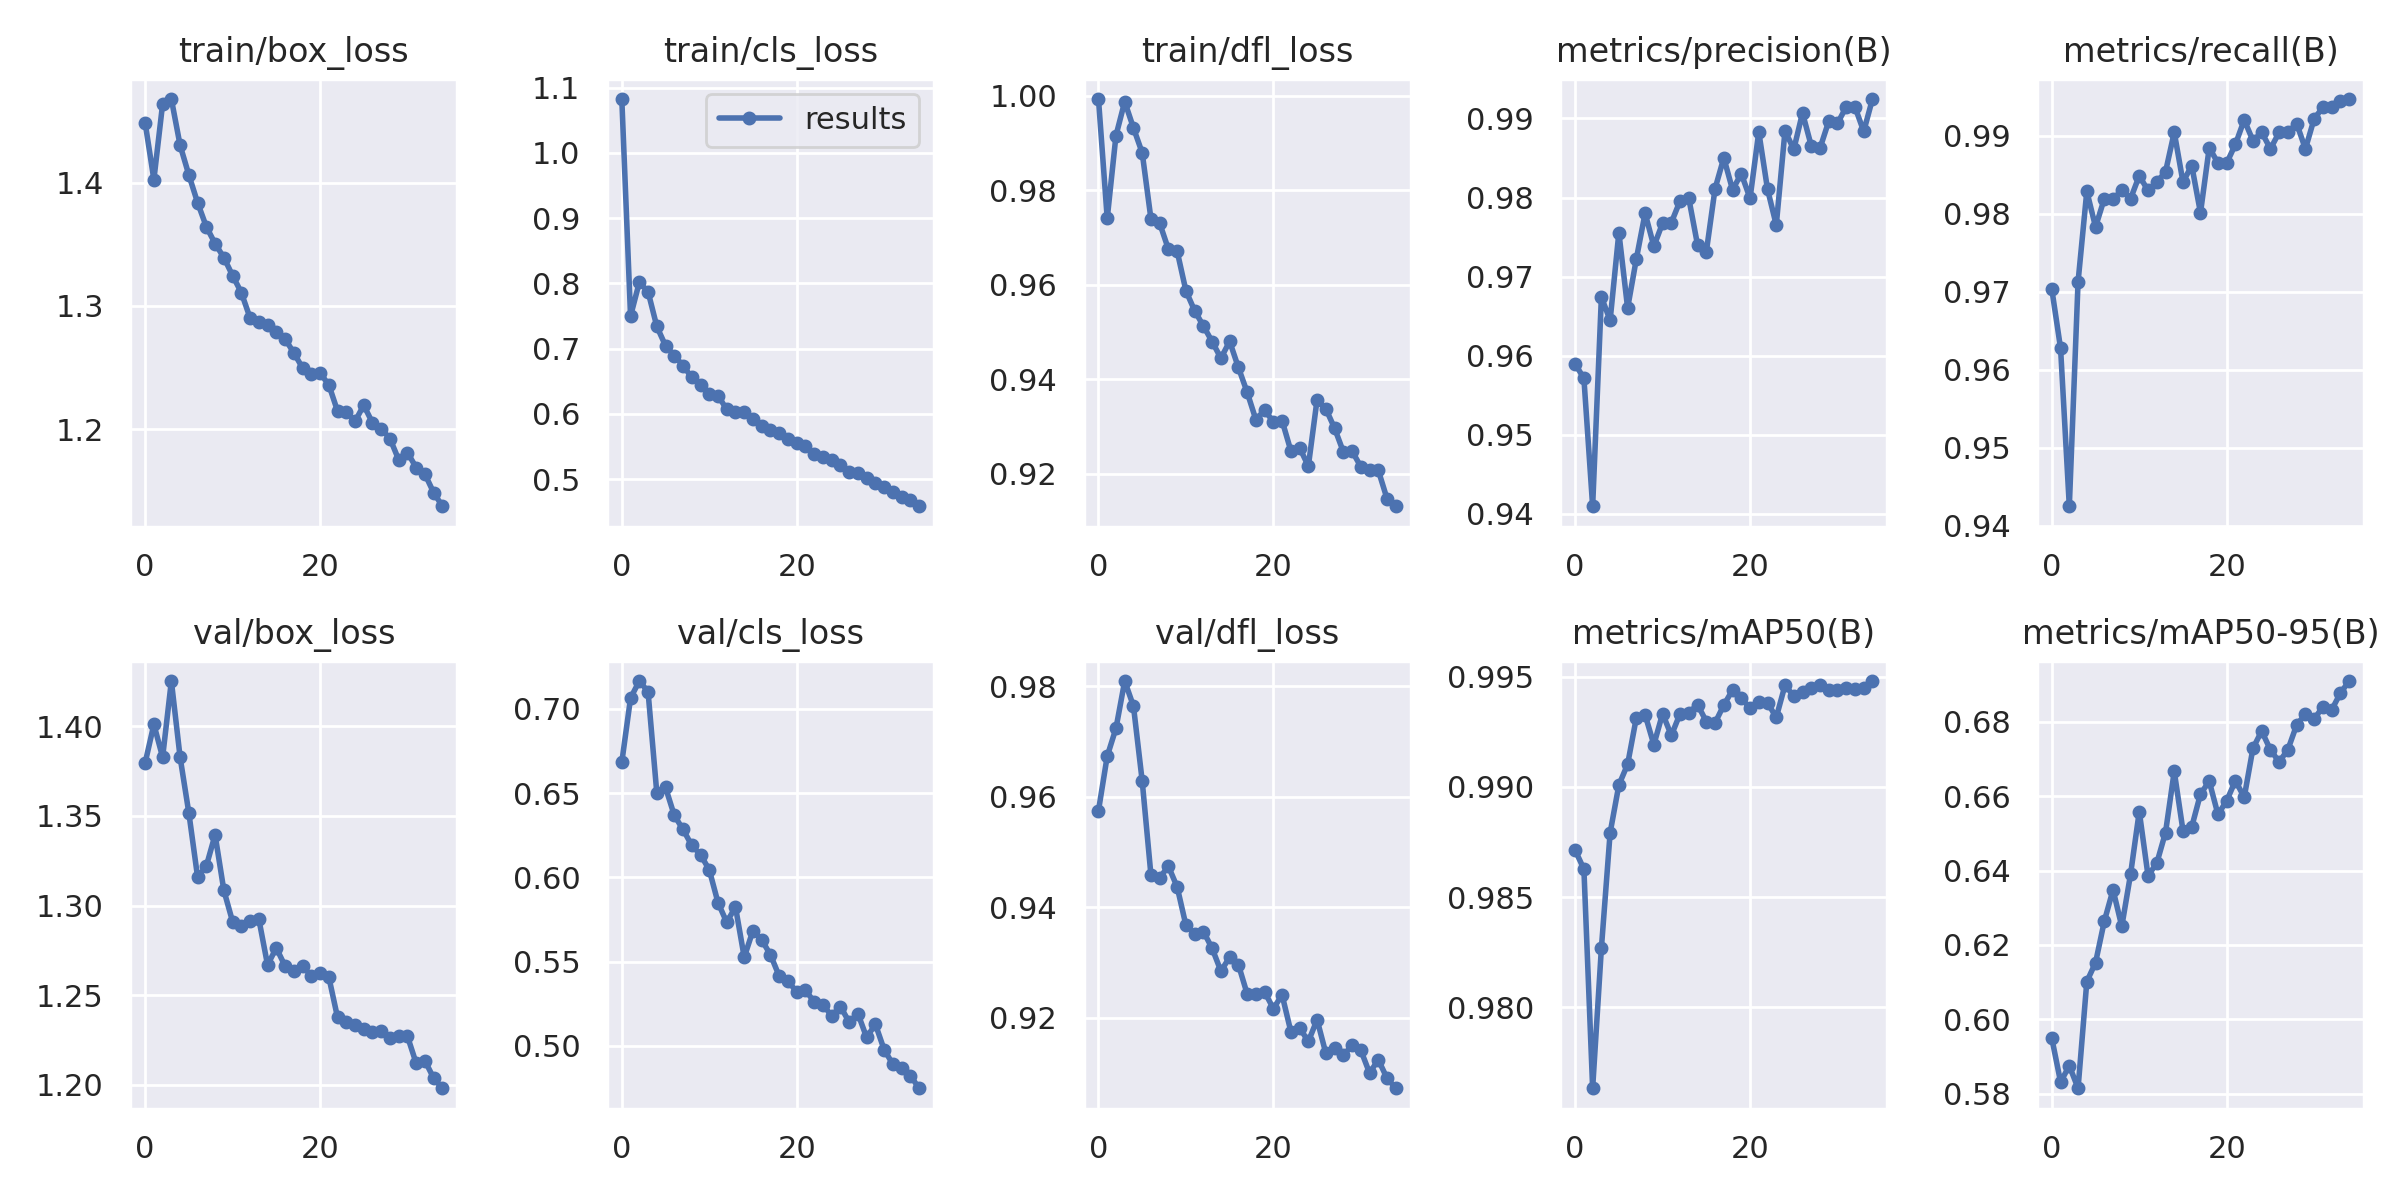

In [ ]:
#Common Results from YOLOv8
Image(filename="runs/detect/train/results.png", width=600)

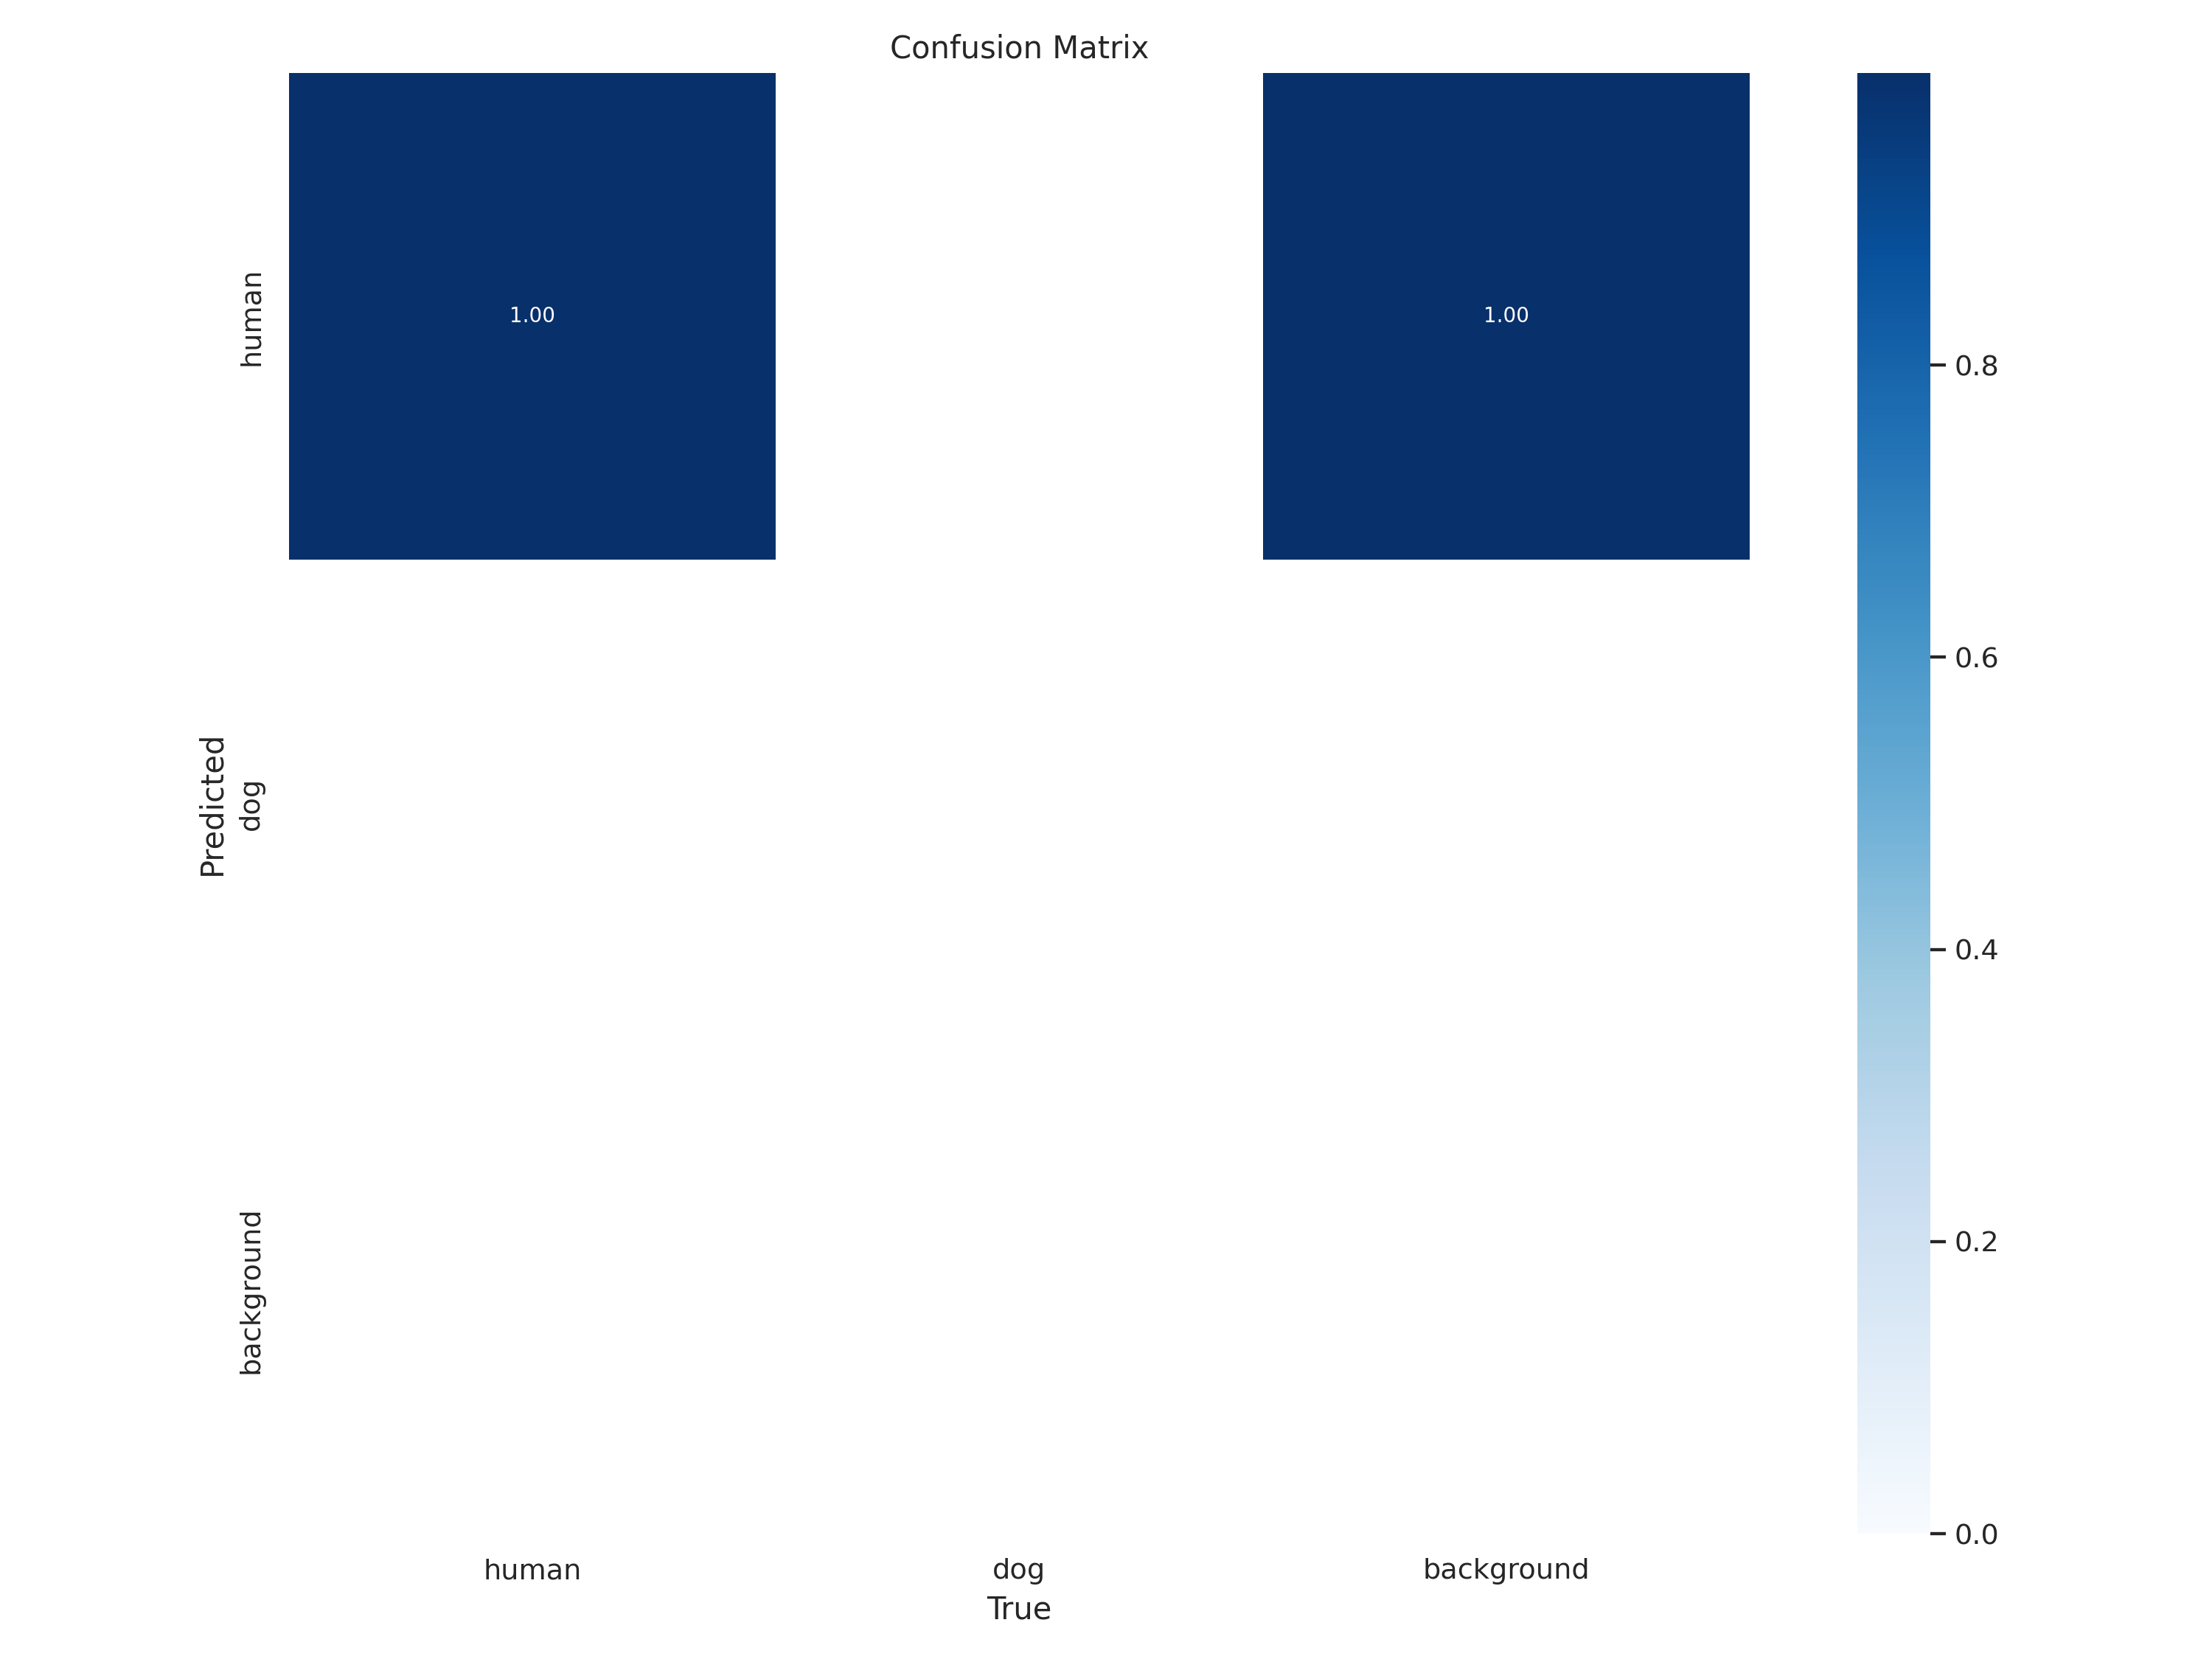

In [ ]:
#Confusion Matrix
Image(filename="runs/detect/train/confusion_matrix.png", width=600)

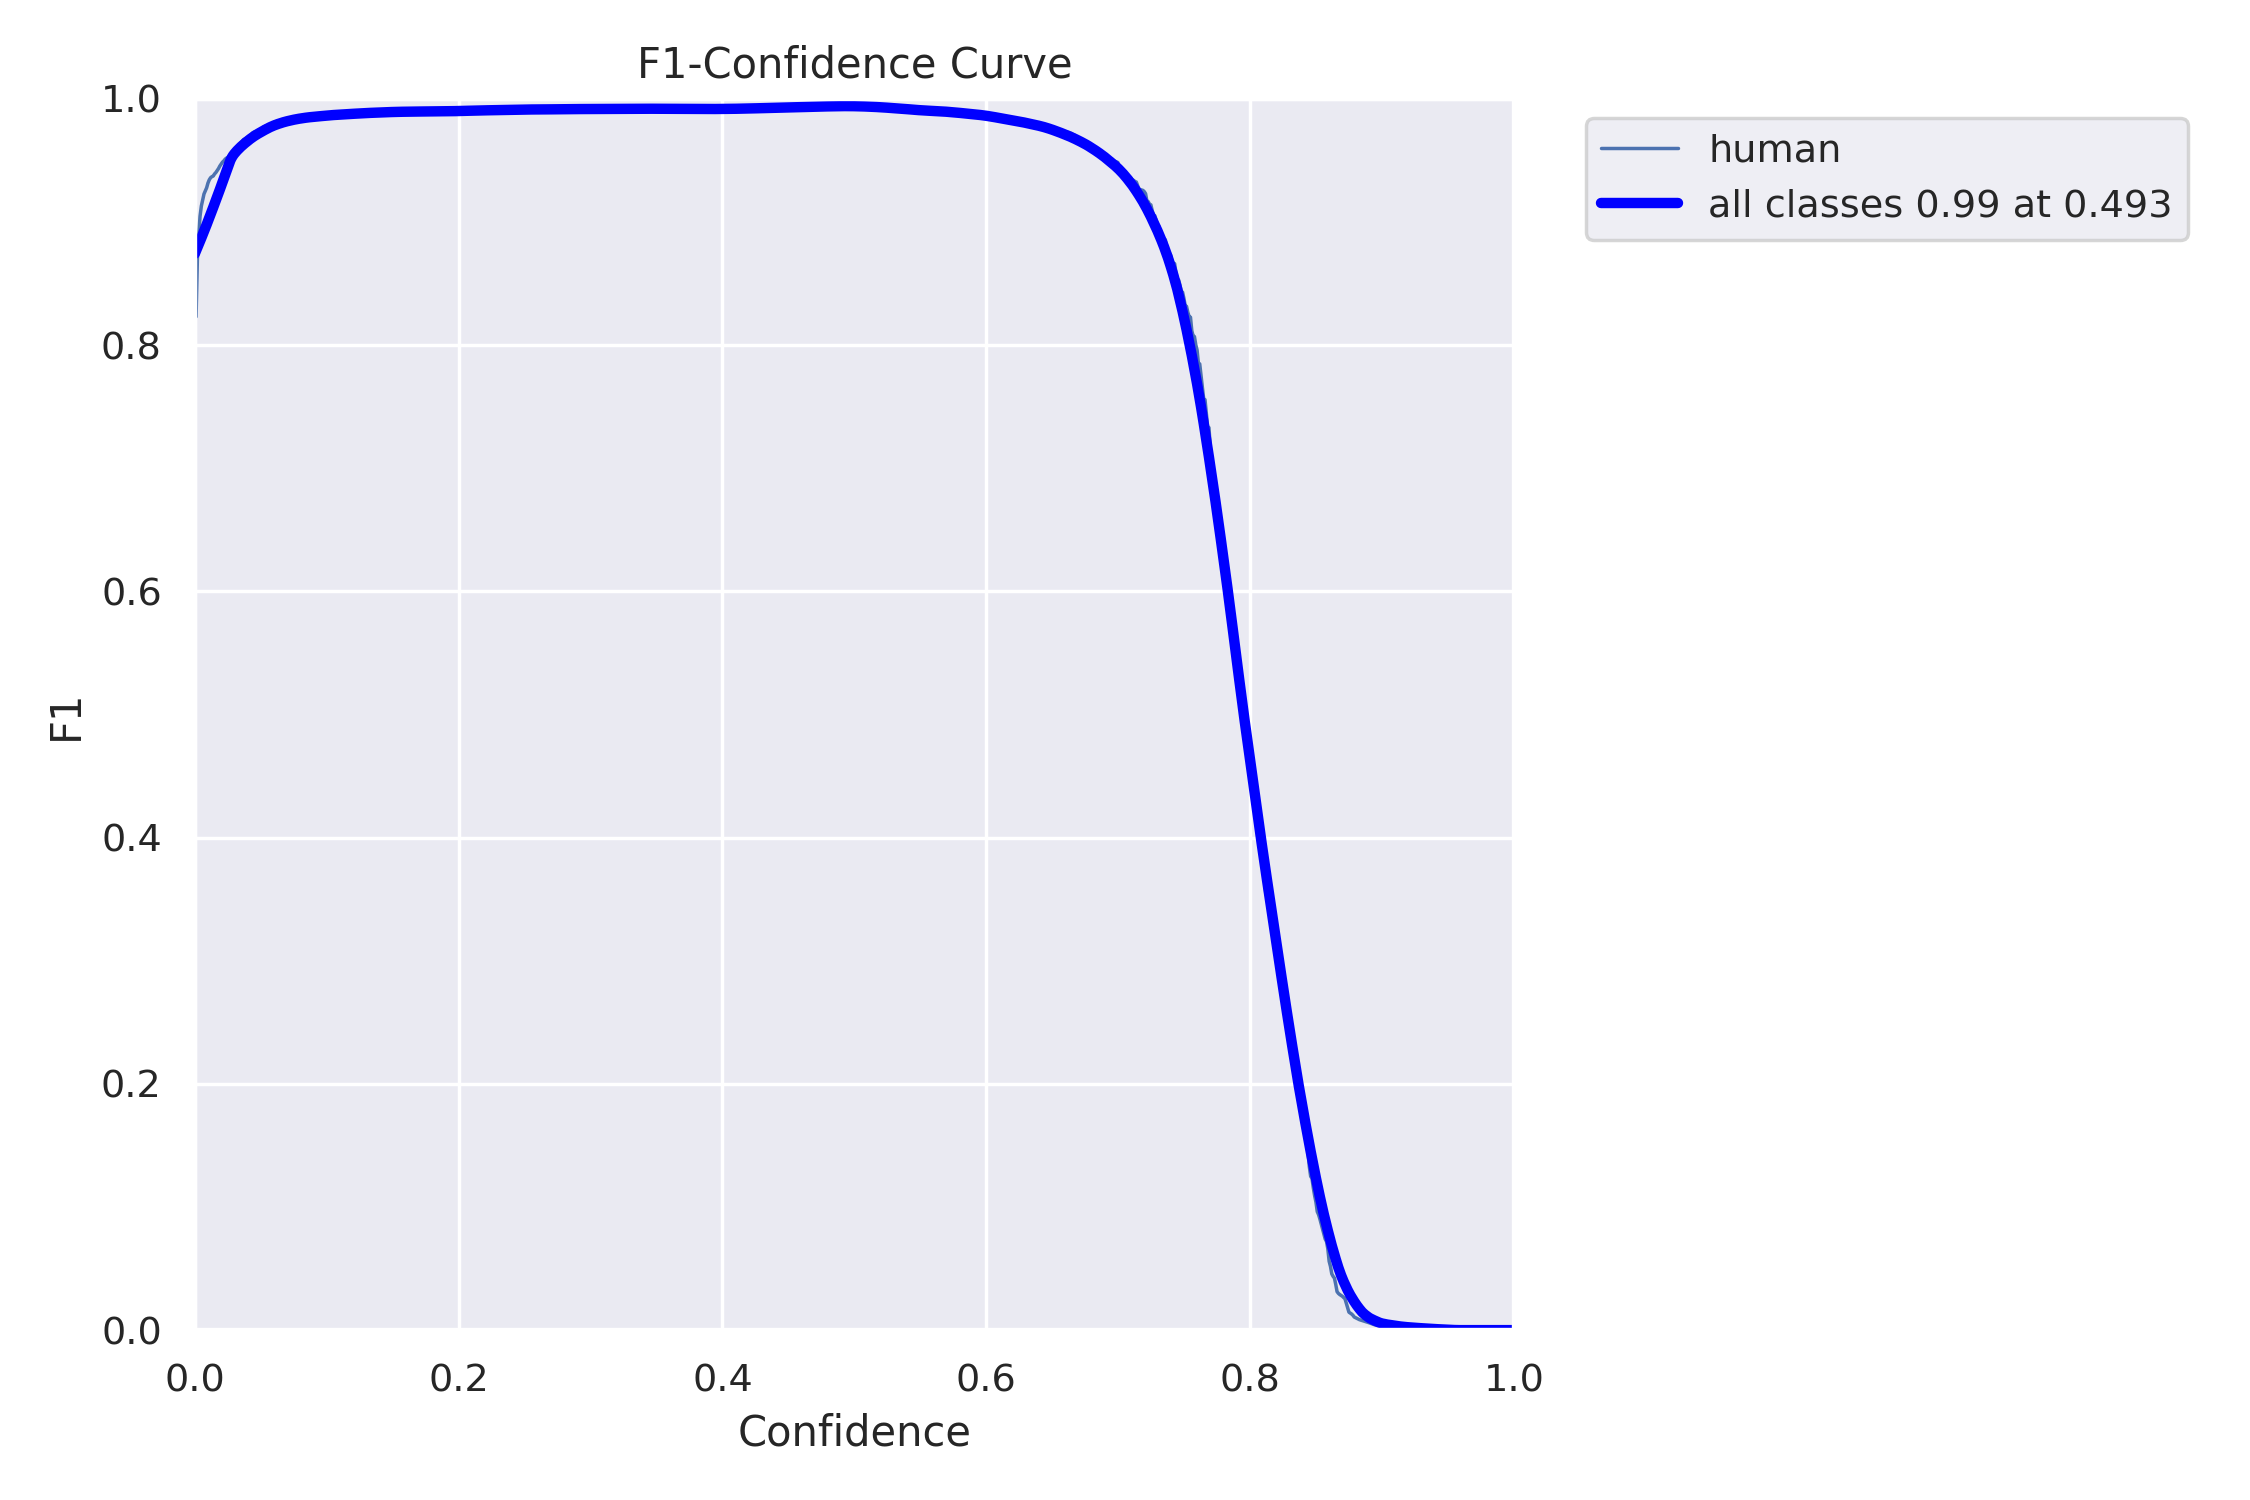

In [ ]:
#F1_Curve
Image(filename="/content/runs/detect/train/F1_curve.png", width=600)

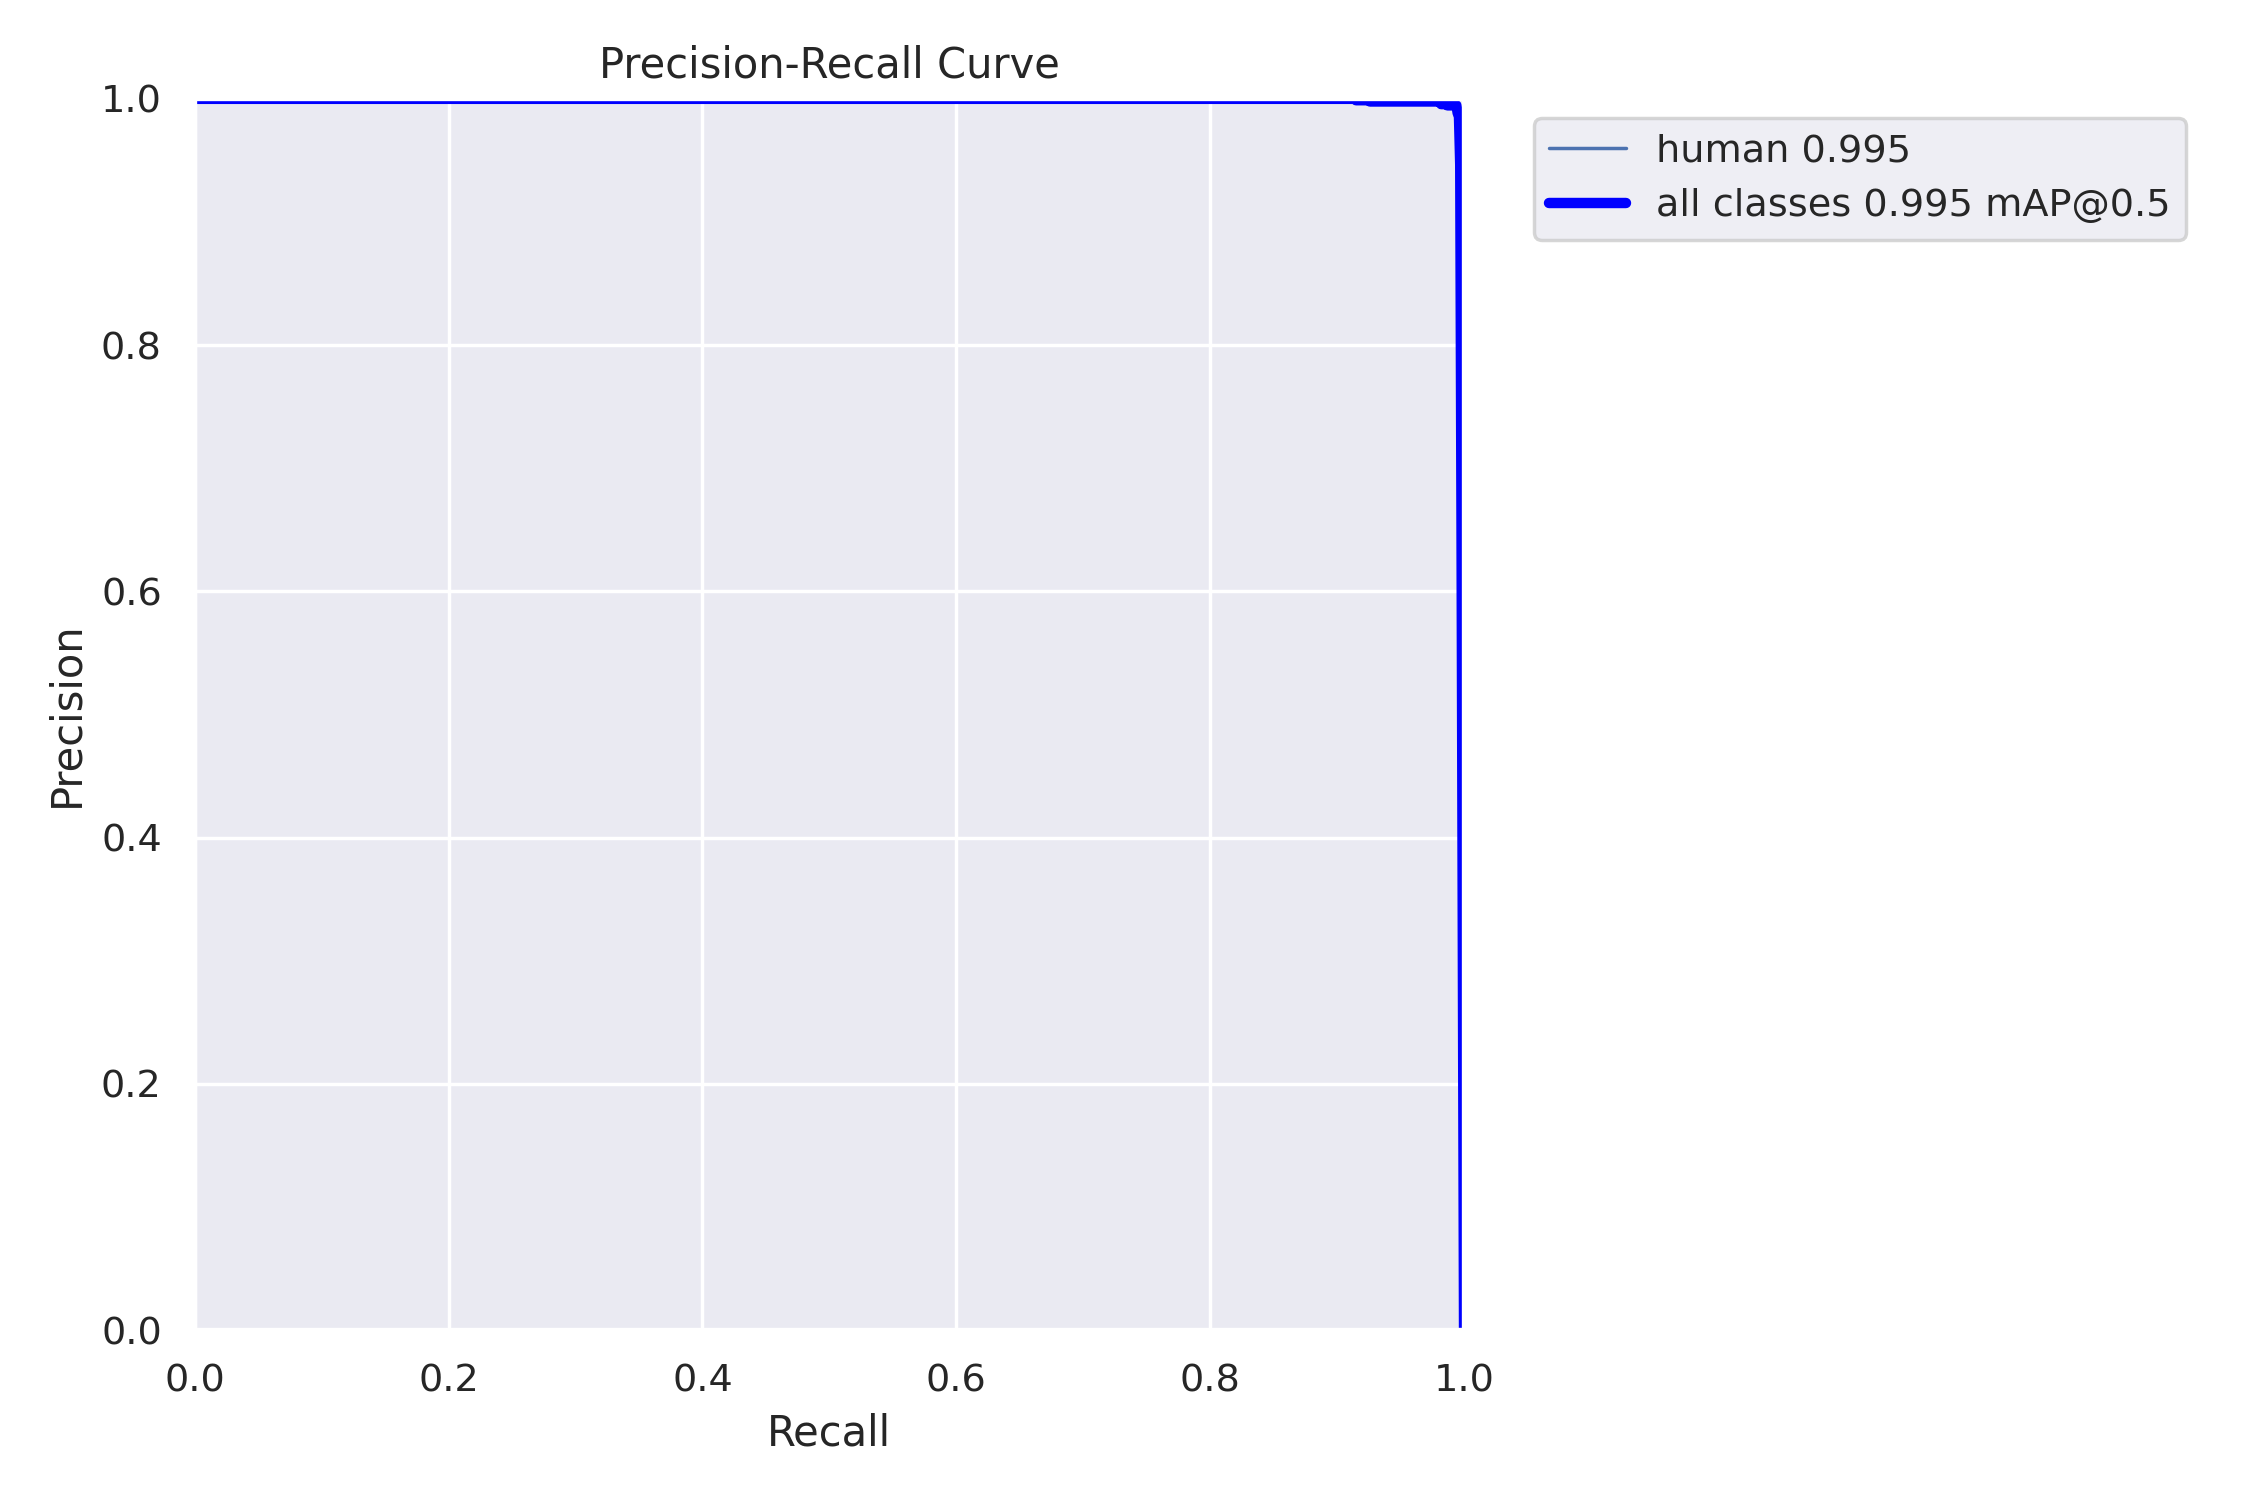

In [ ]:
#PR_Curve
Image(filename="/content/runs/detect/train/PR_curve.png", width=600)

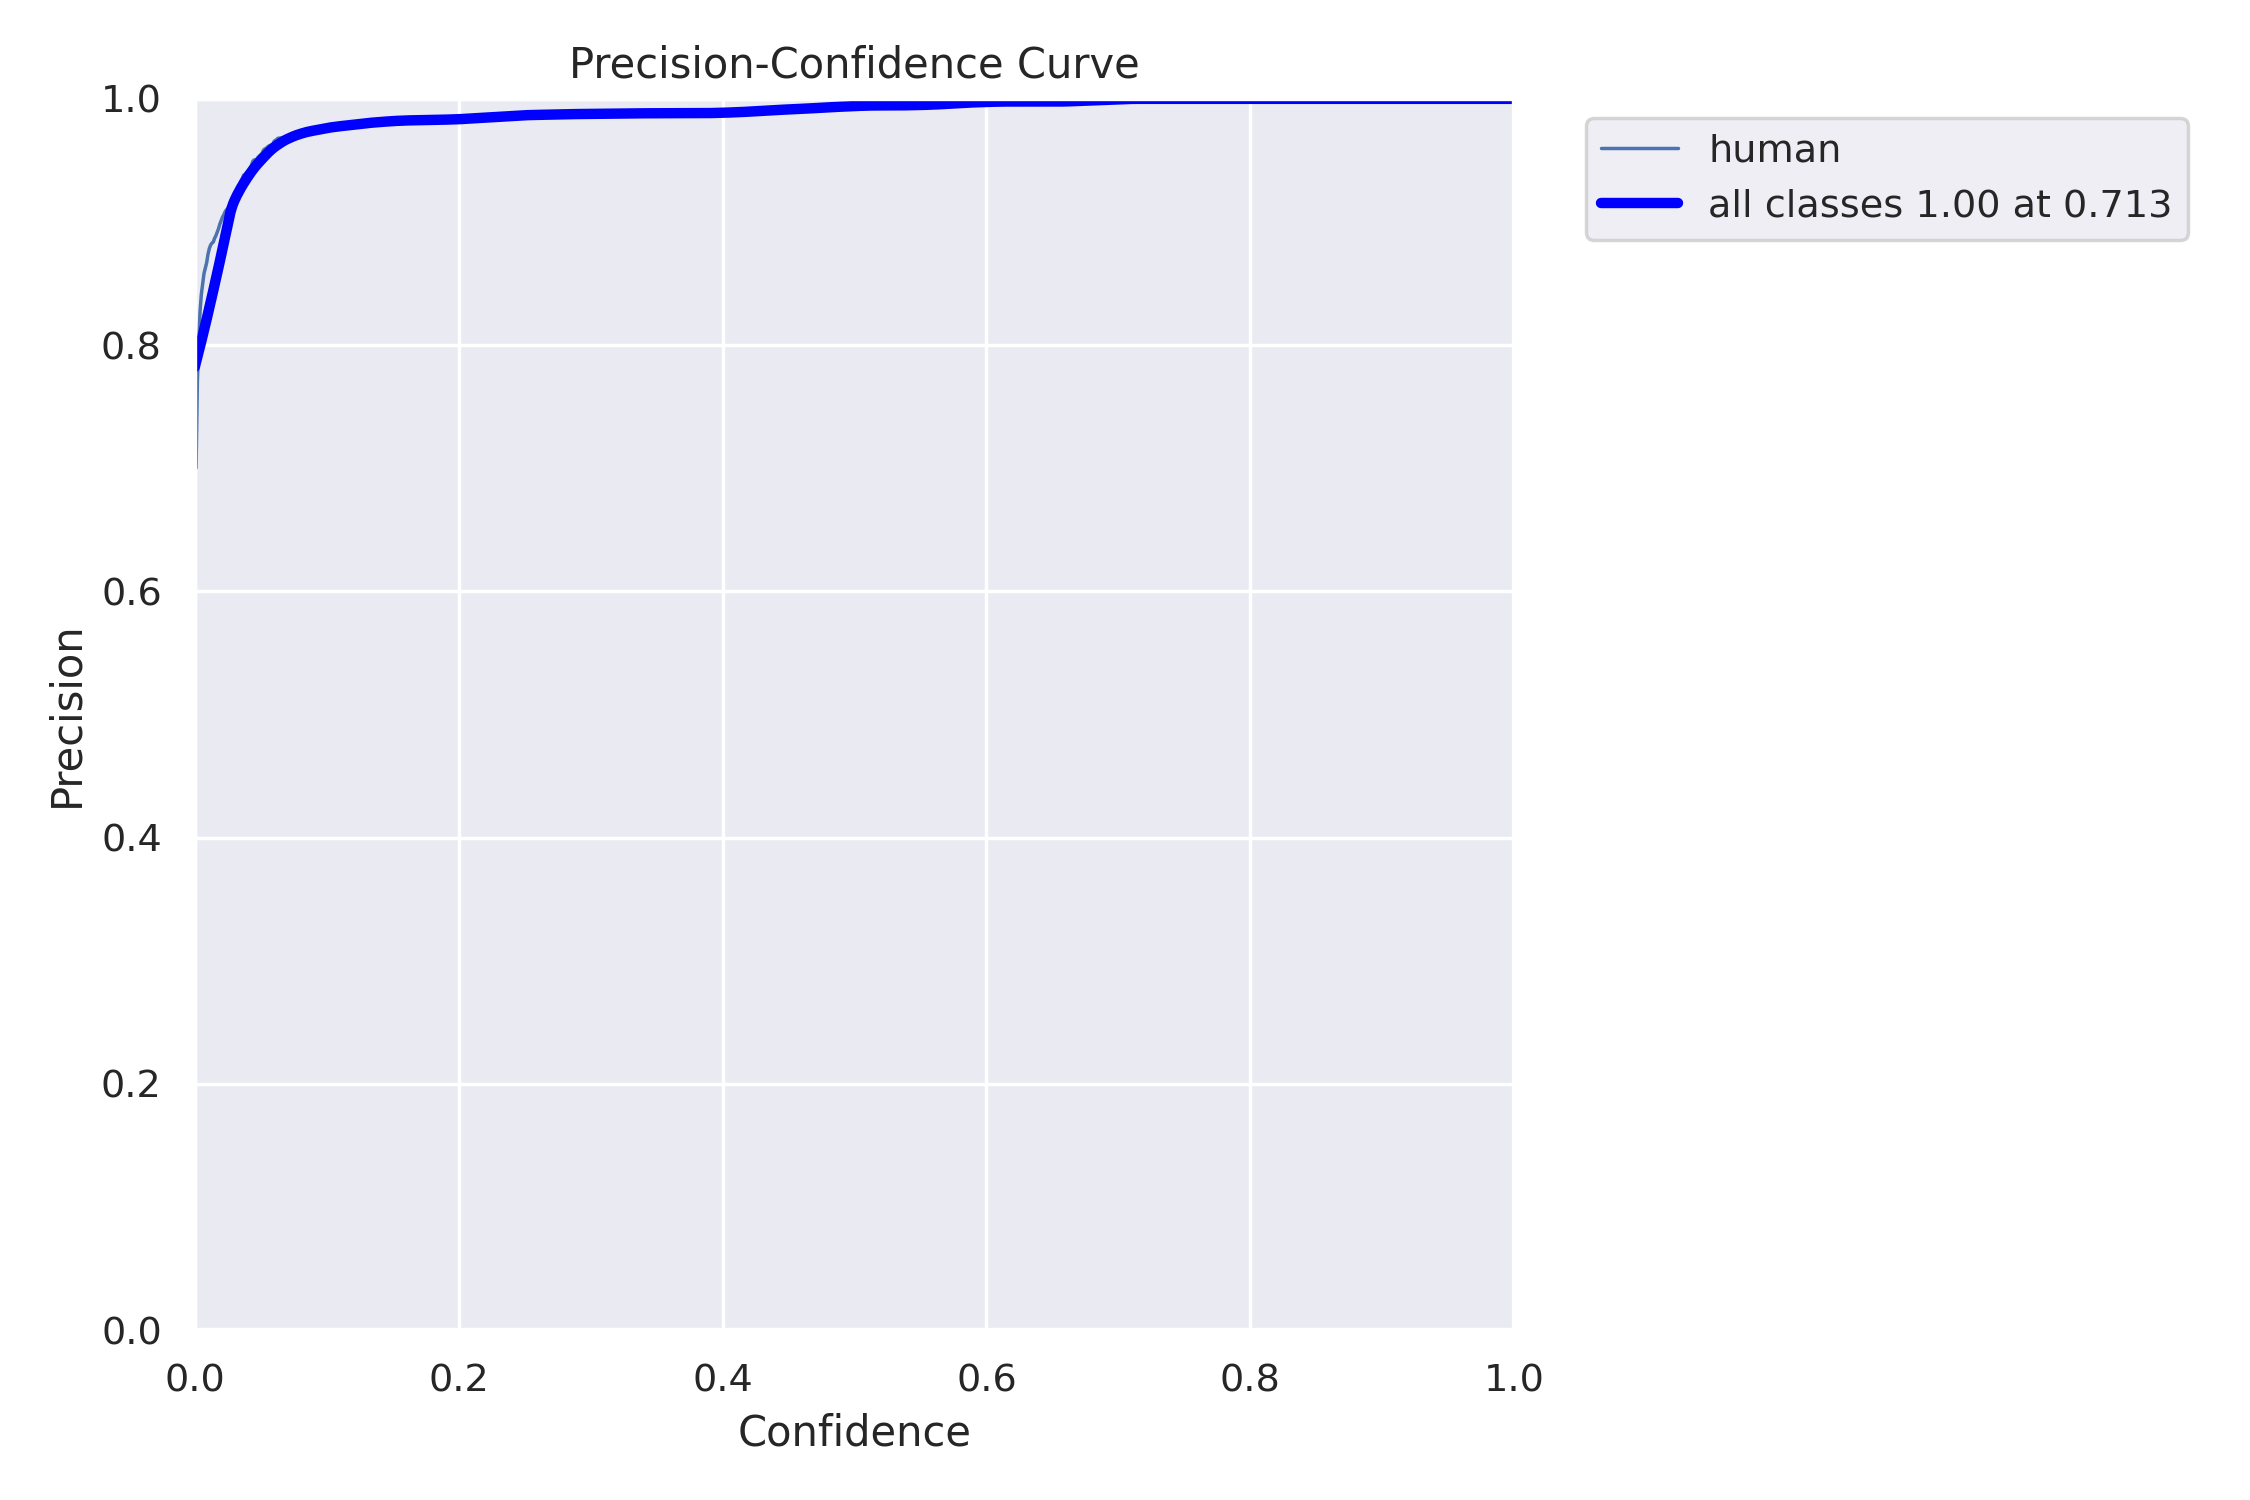

In [ ]:
#P_Curve
Image(filename="/content/runs/detect/train/P_curve.png", width=600)

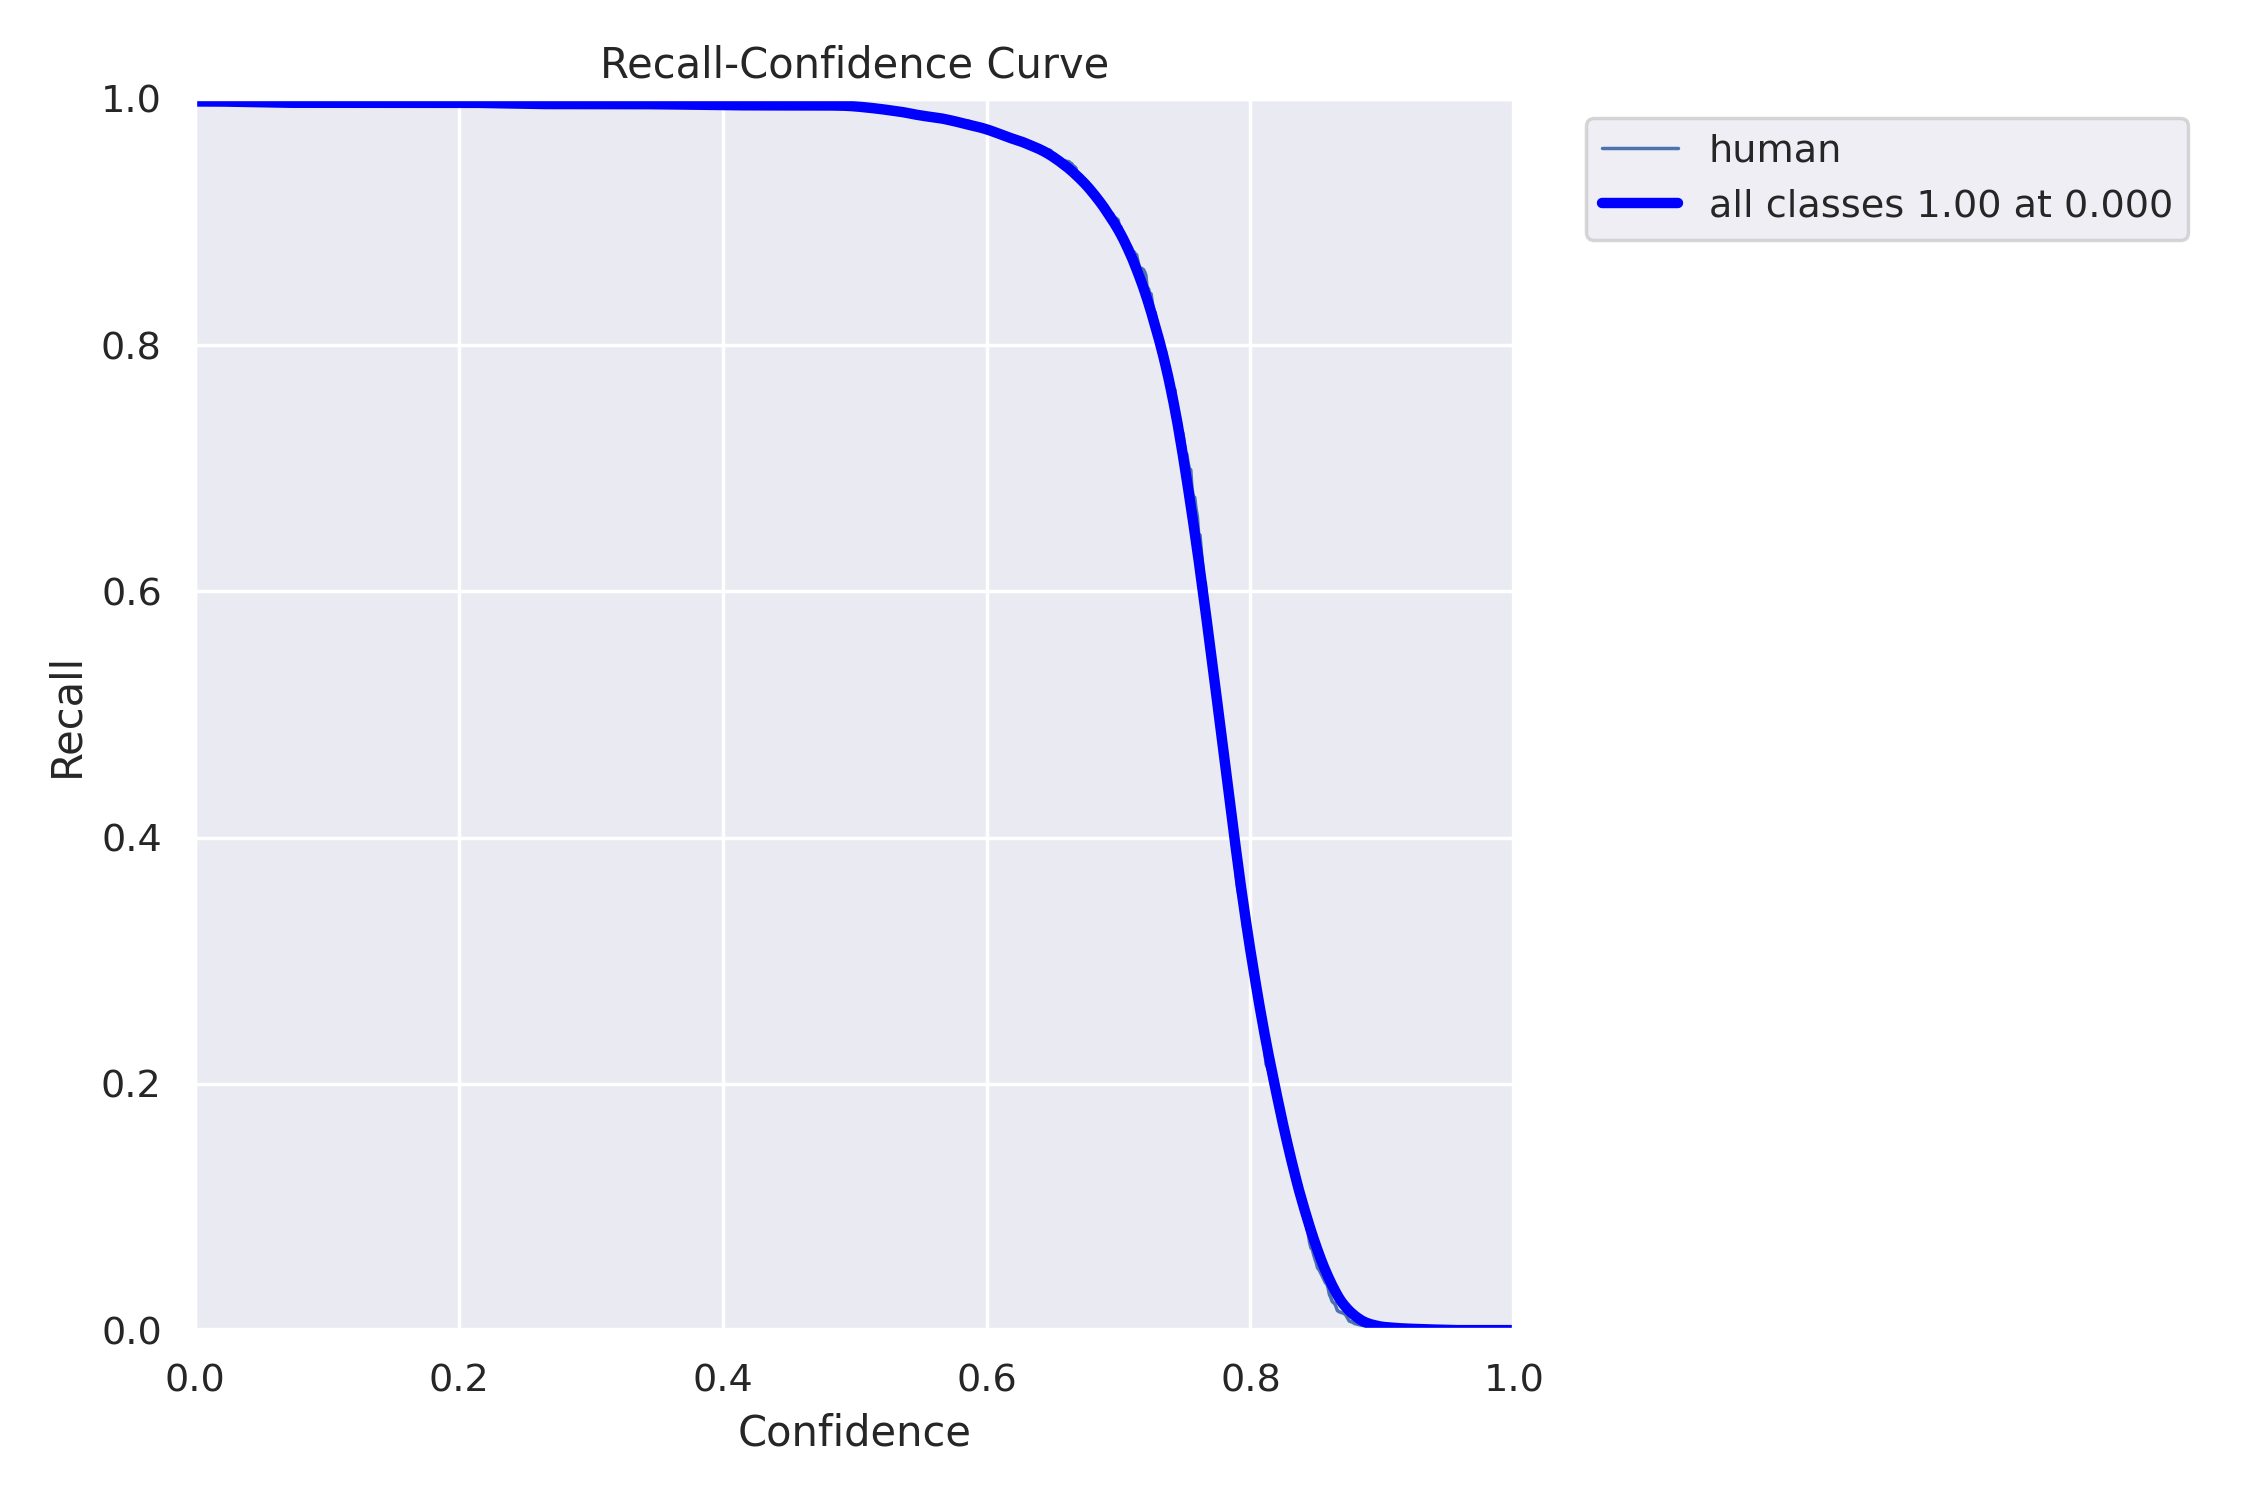

In [ ]:
#R_Curve
Image(filename="/content/runs/detect/train2/R_curve.png", width=600)

# **Validation**

In [ ]:
!yolo task=detect mode=val model=/content/yolov8s.pt data=/content/datasets/data.yaml

2023-12-02 16:33:25.903129: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 16:33:25.903203: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 16:33:25.903248: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 16:33:27.206943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/datasets/val/labels.cache... 633 images, 7 ba

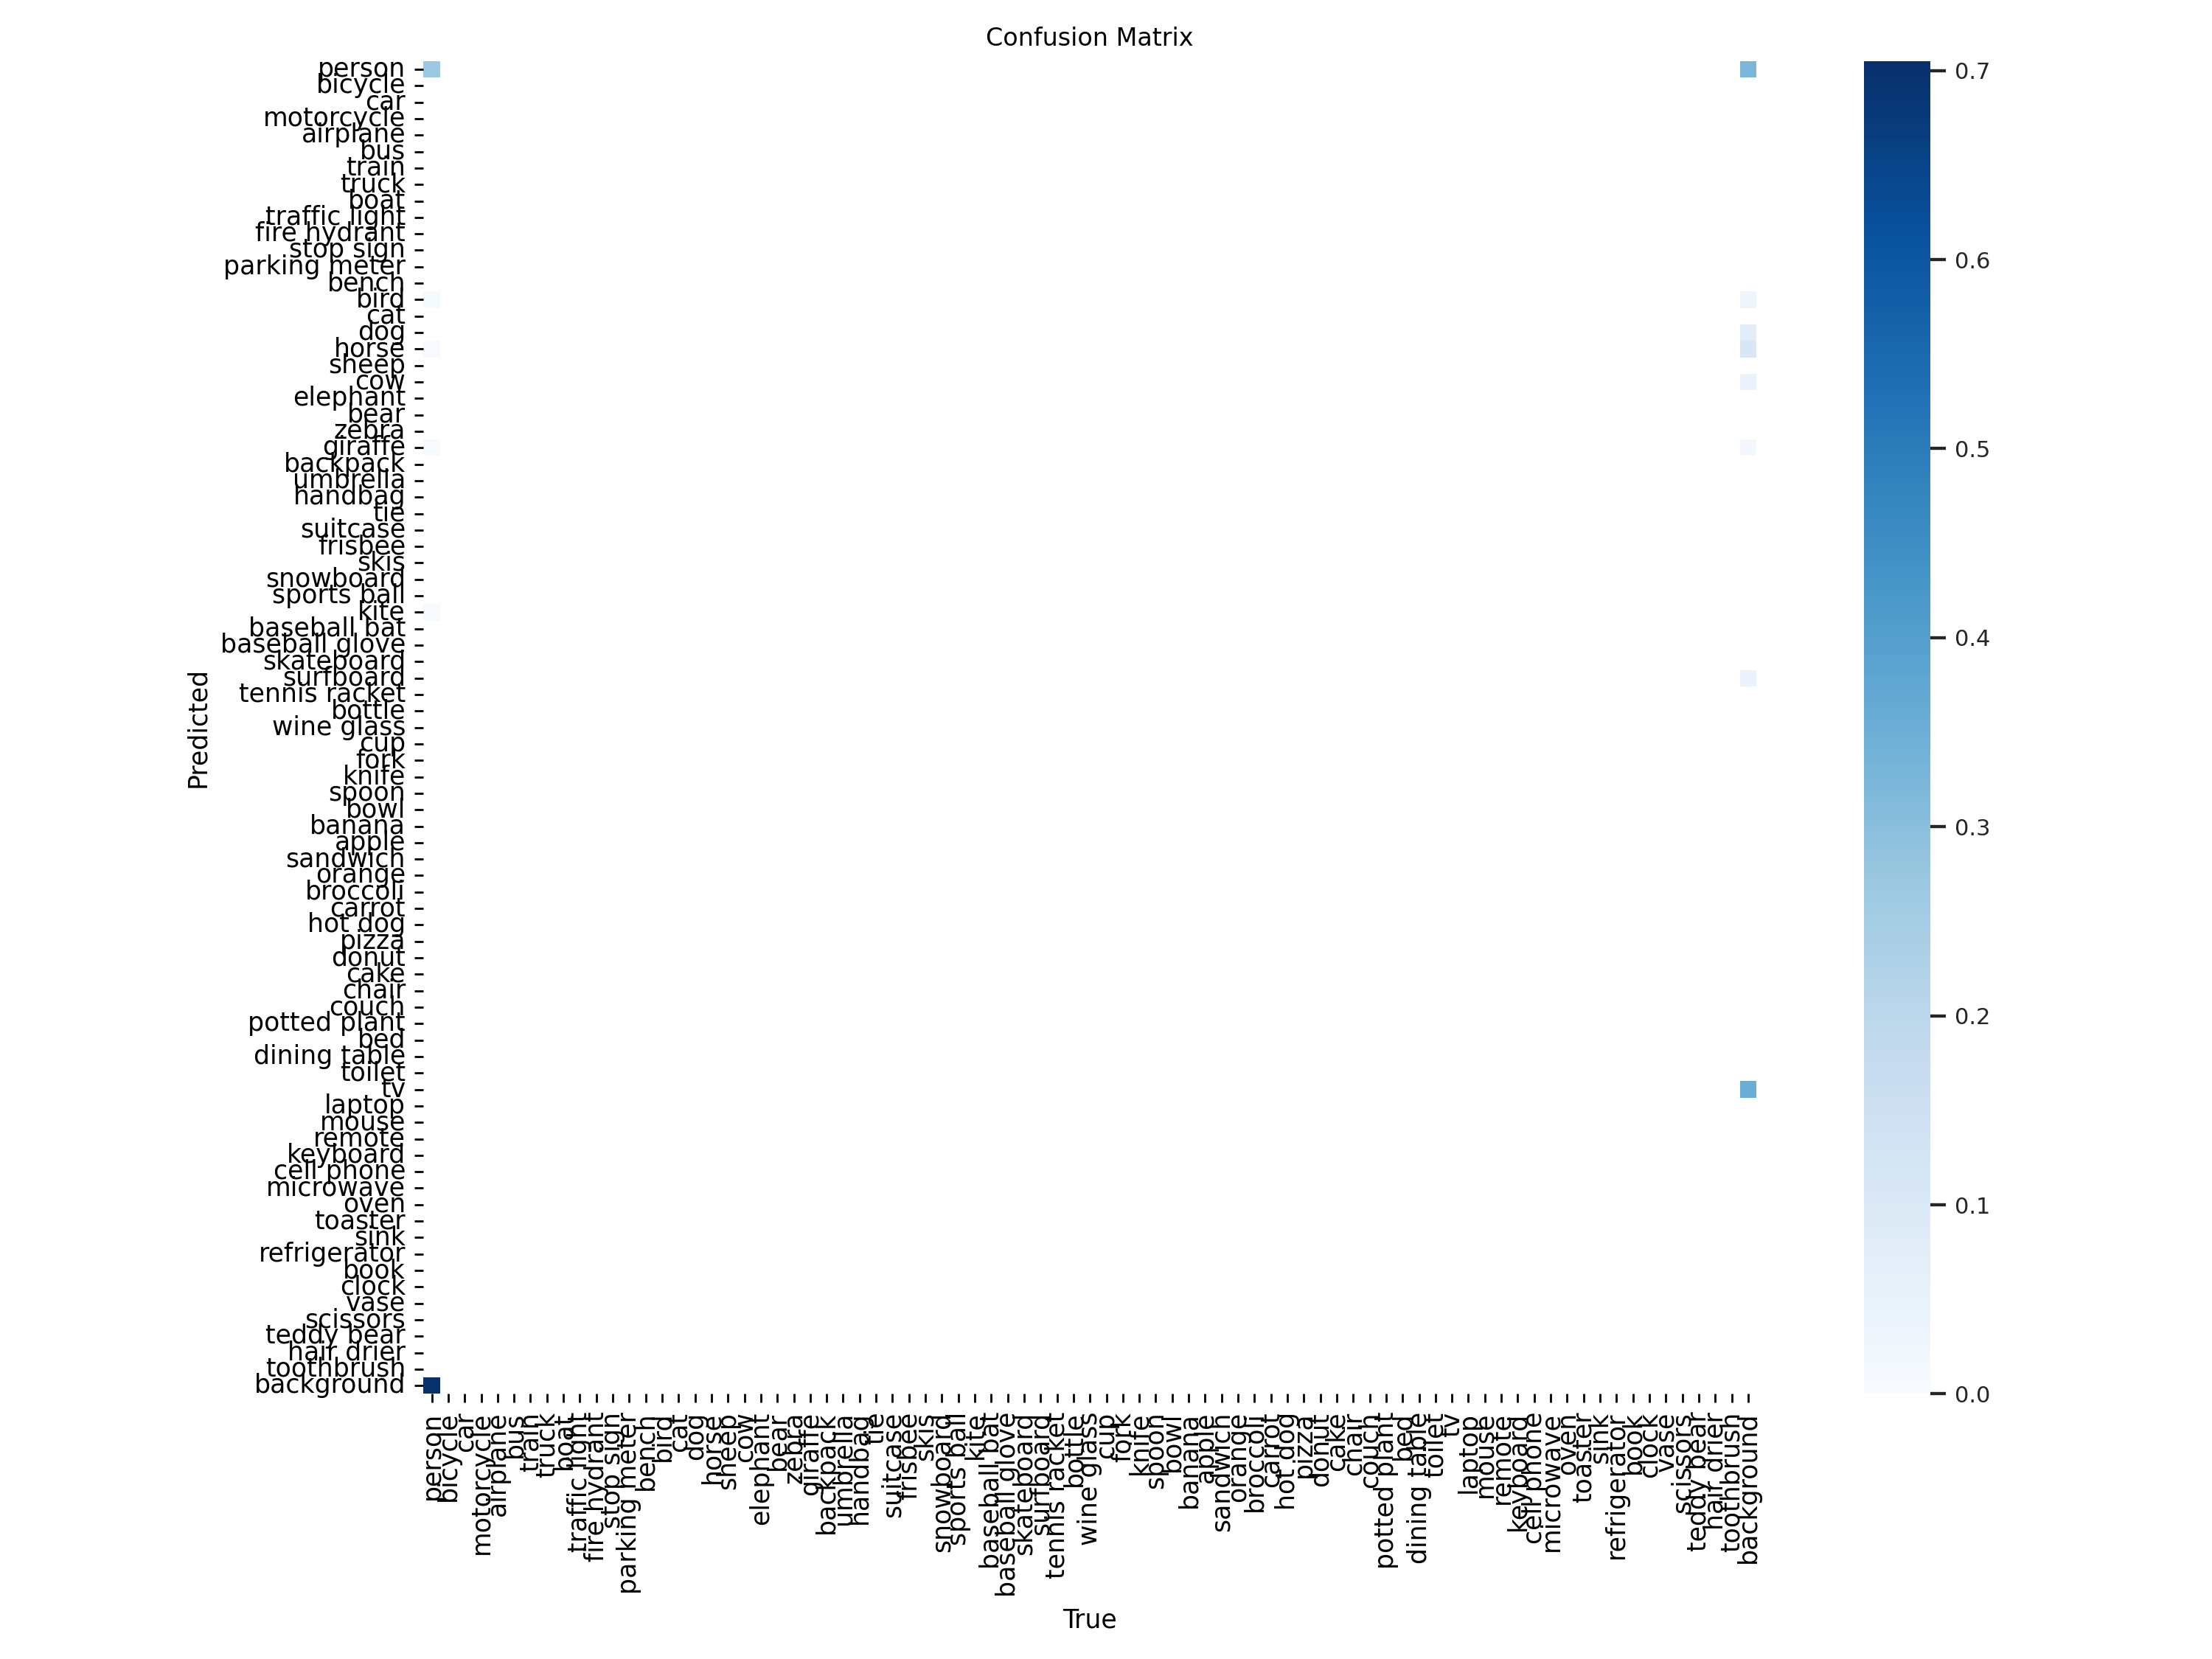

In [ ]:
#Confusion Matrix
Image(filename="runs/detect/val/confusion_matrix.png", width=600)

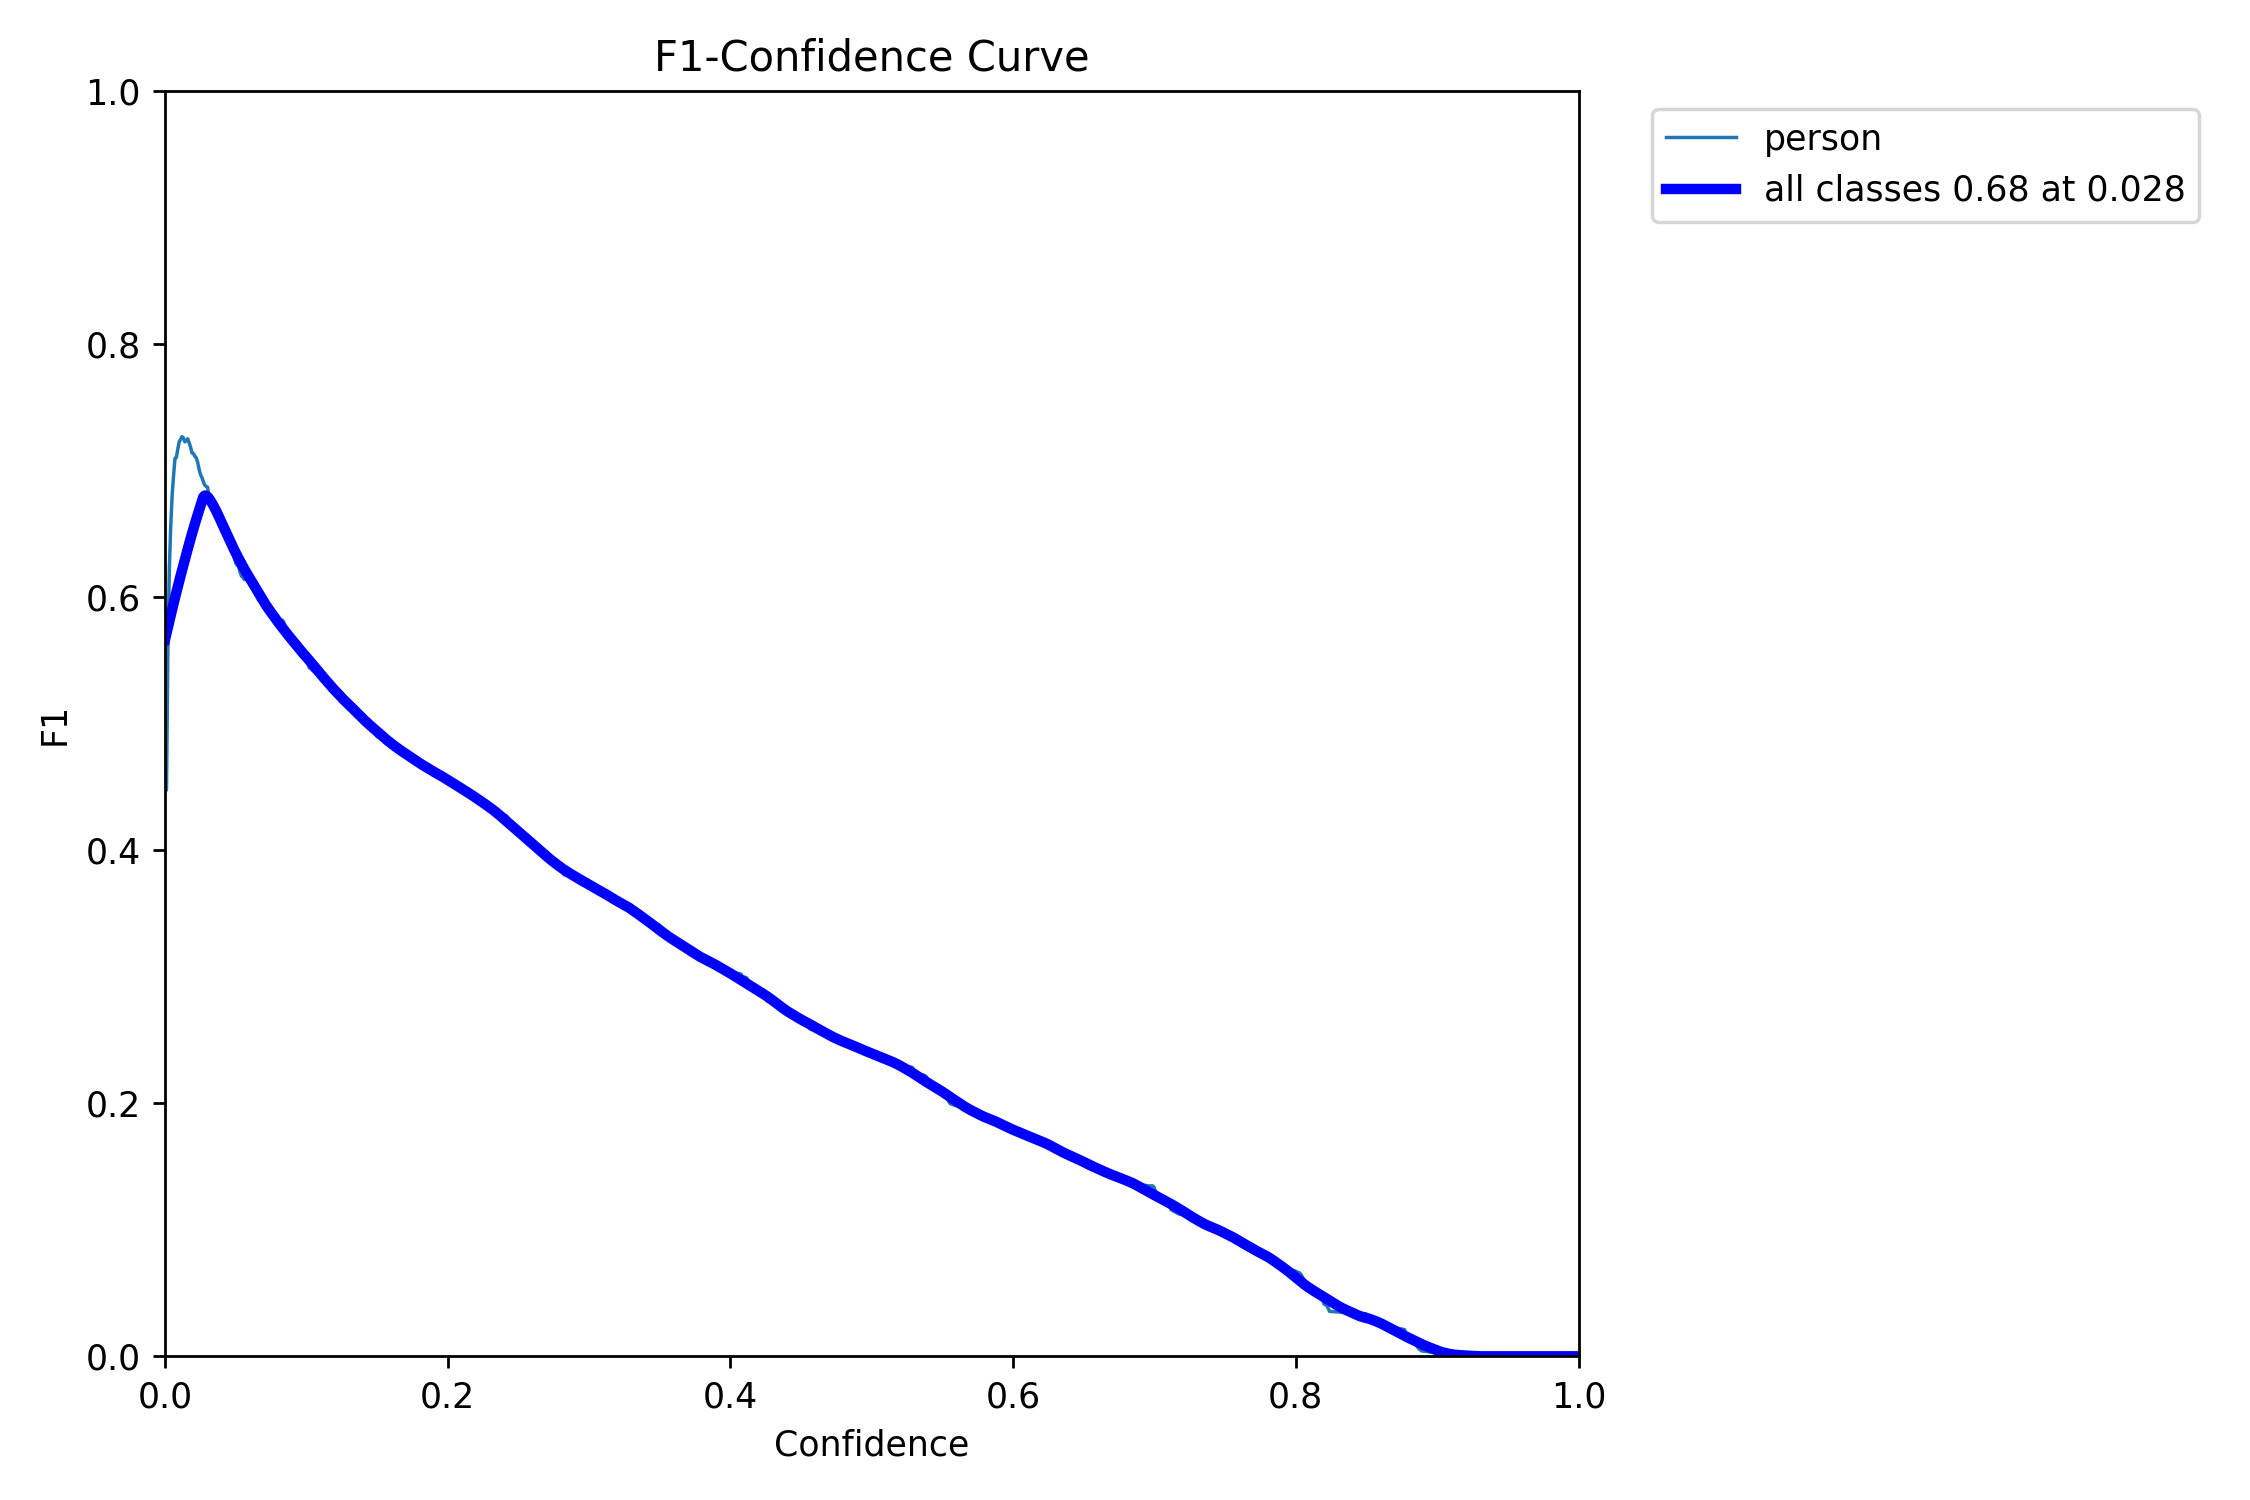

In [ ]:
#F1 Curve
Image(filename="/content/runs/detect/val/F1_curve.png", width=600)

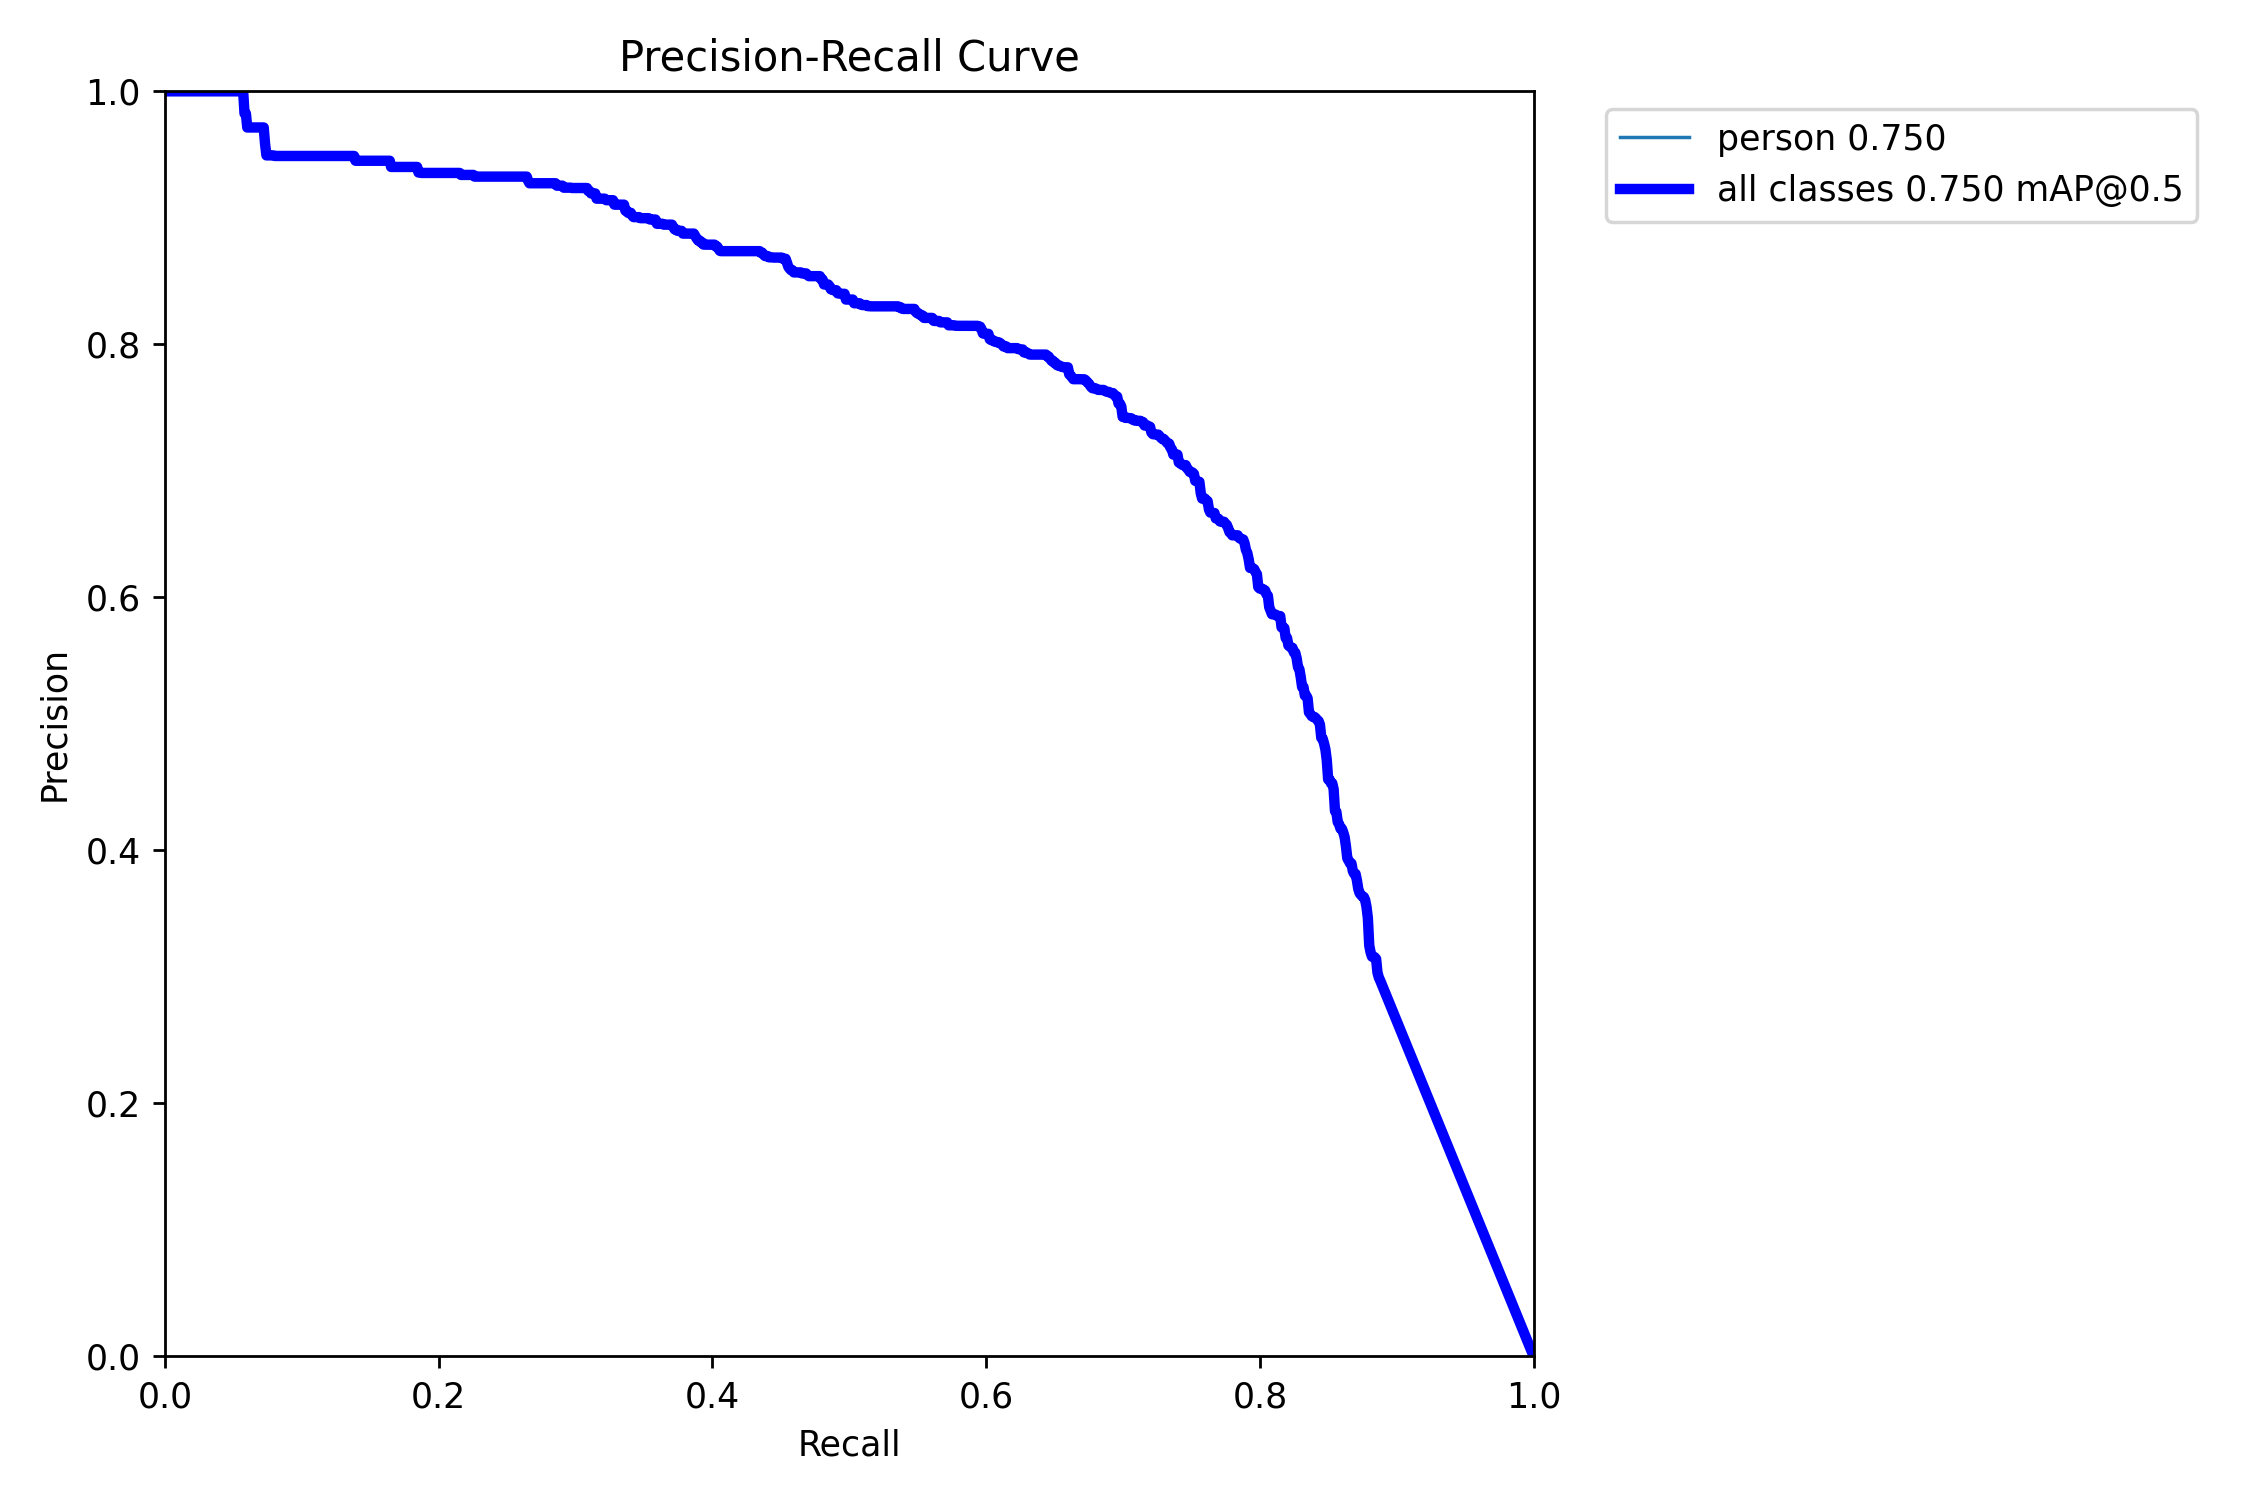

In [ ]:
#PR Curve
Image(filename="/content/runs/detect/val/PR_curve.png", width=600)

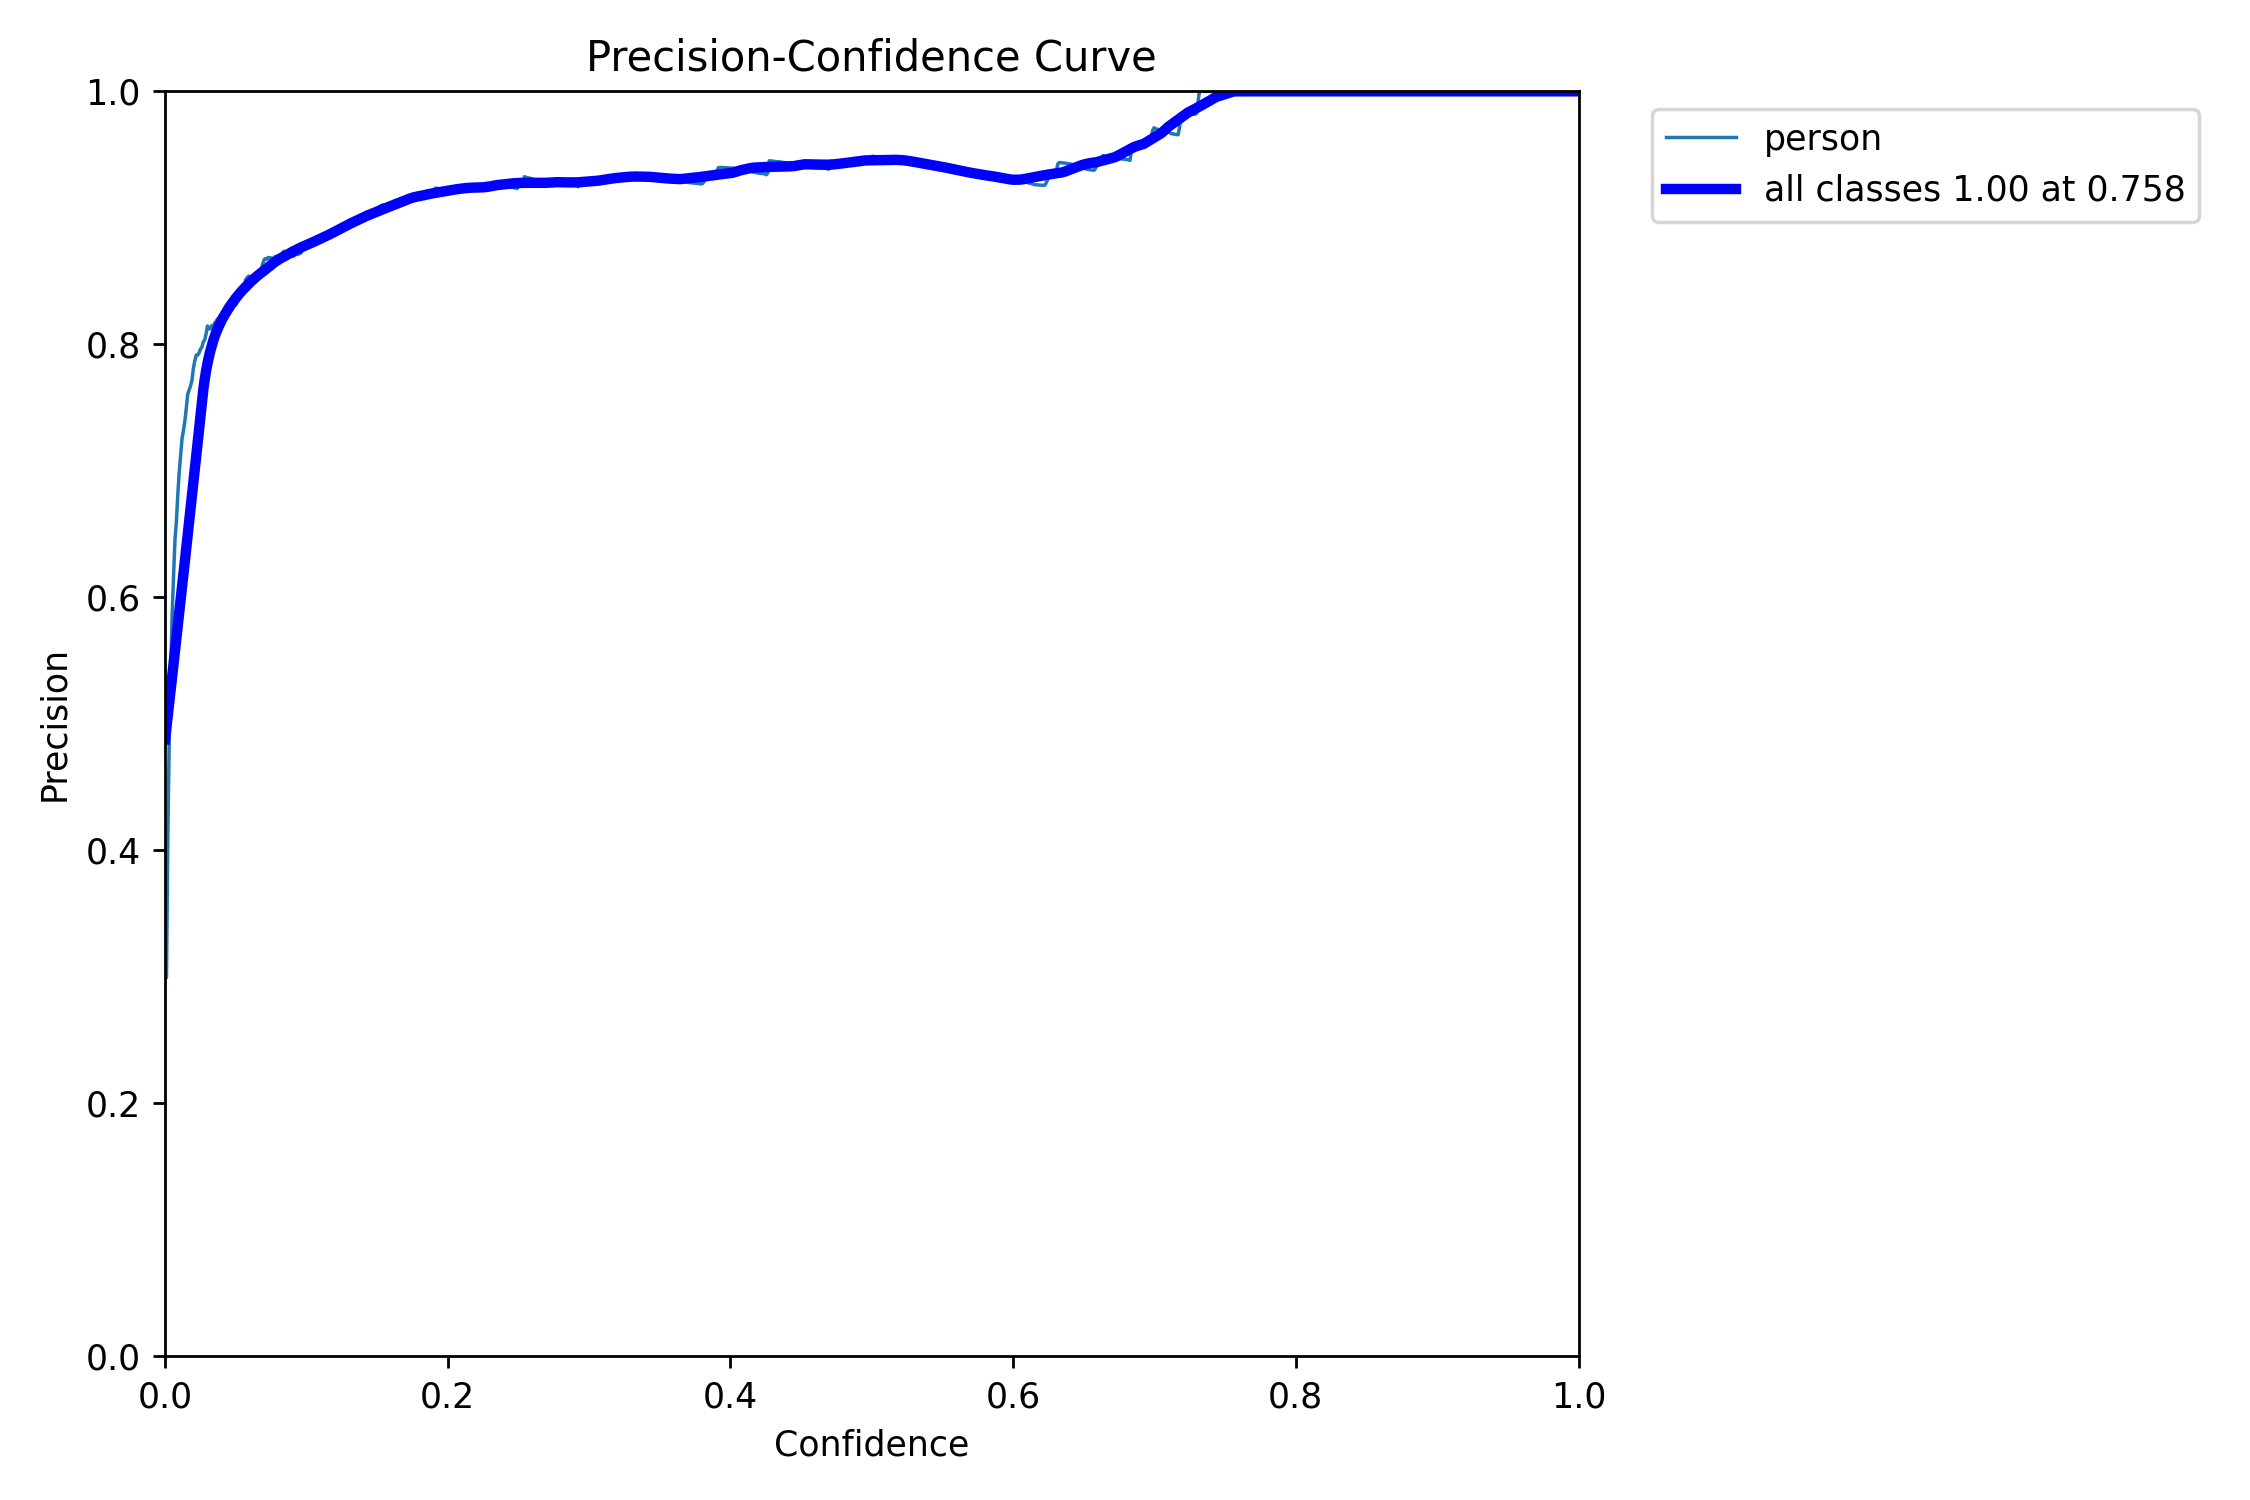

In [ ]:
#P Curve
Image(filename="/content/runs/detect/val/P_curve.png", width=600)

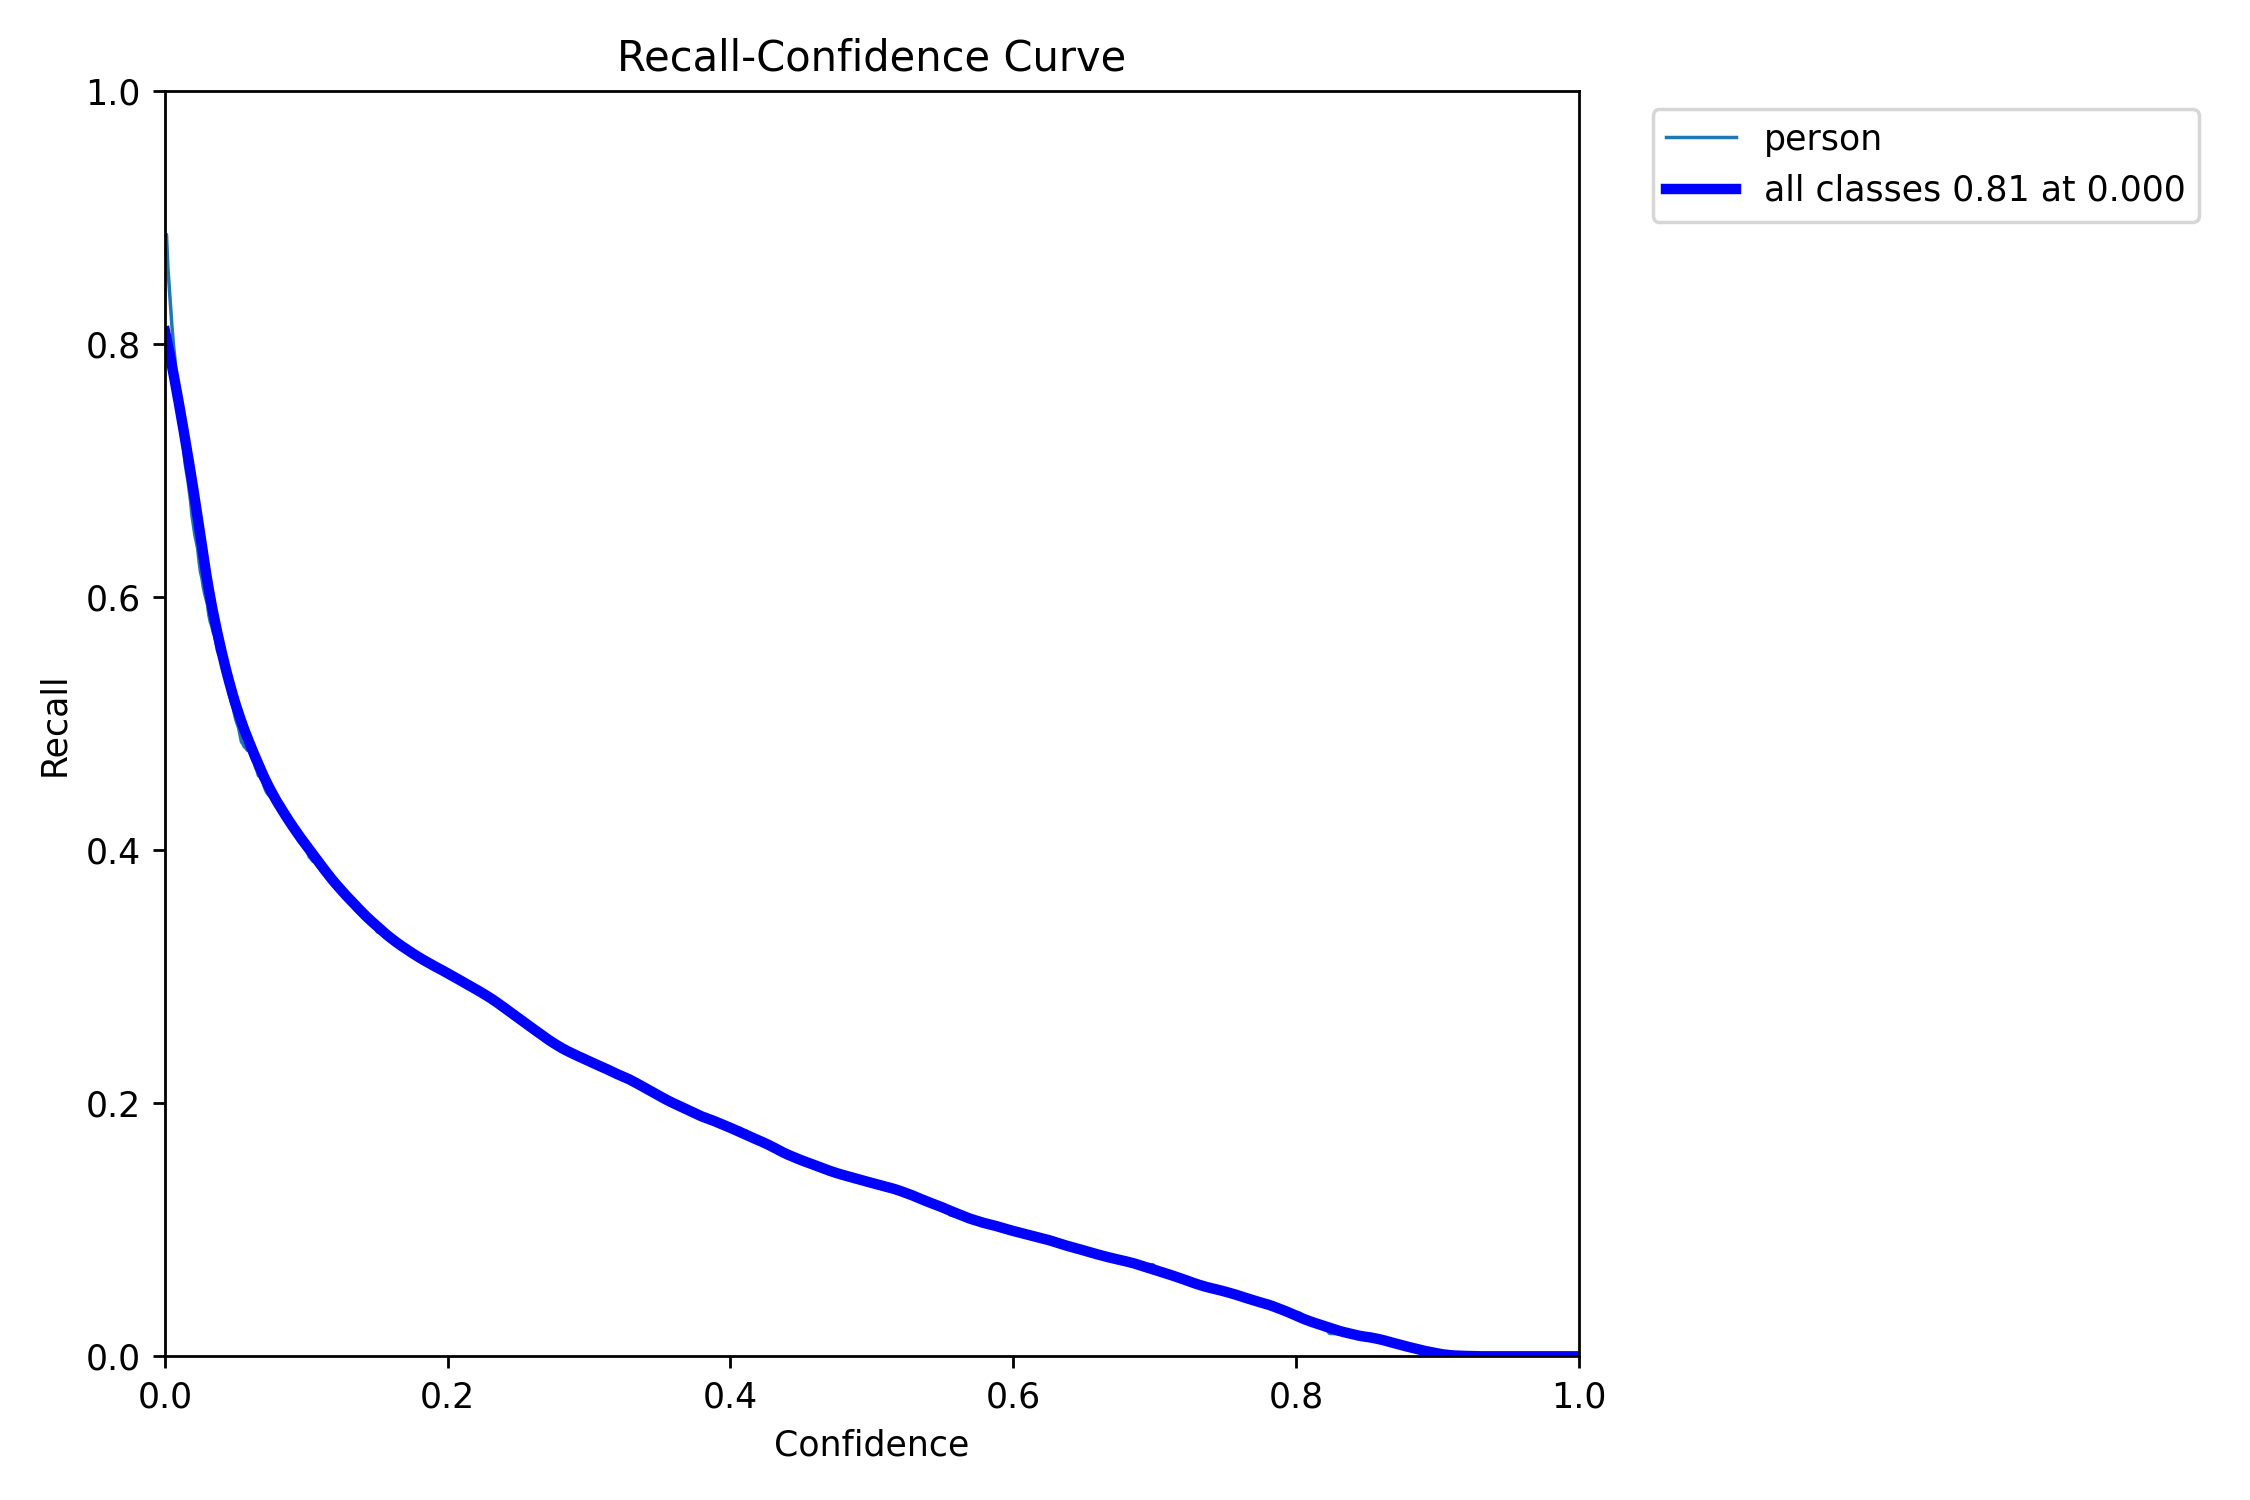

In [ ]:
#R Curve
Image(filename="/content/runs/detect/val/R_curve.png", width=600)

# **Inference**

In [ ]:
!yolo task=detect mode=predict save=True model=/content/runs/detect/train2/weights/best.pt conf=0.25 source="/content/datasets/test/images"

2023-12-02 16:57:48.114505: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 16:57:48.114566: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 16:57:48.114608: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 16:57:49.587248: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/951 /content/datasets/test/images/007.jpg: 480x640 2 humans, 

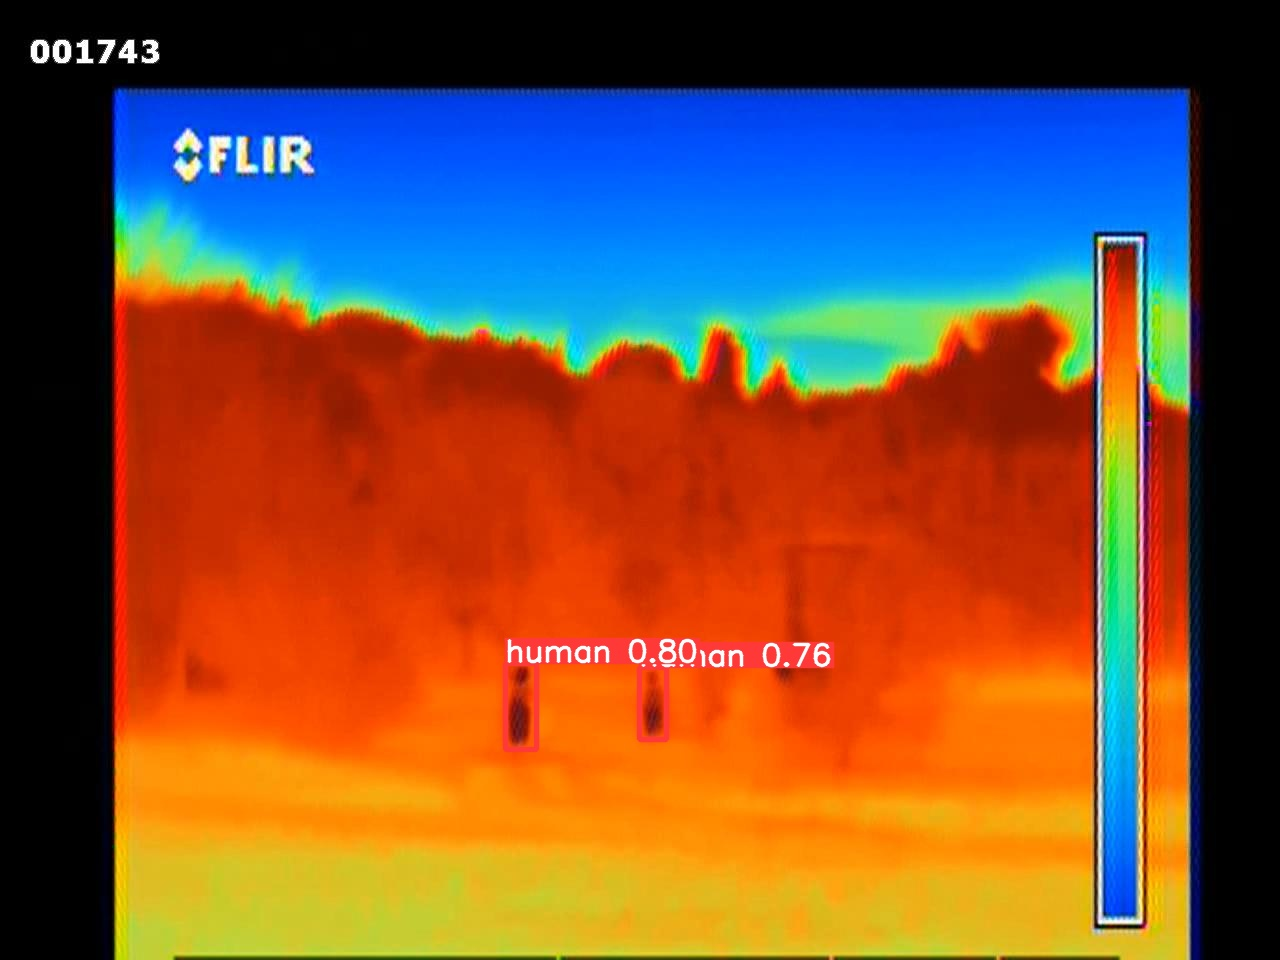

In [ ]:
from IPython.display import Image as IPImage
img_path = "/content/runs/detect/predict/007.jpg"
IPImage(filename=img_path, width=600)

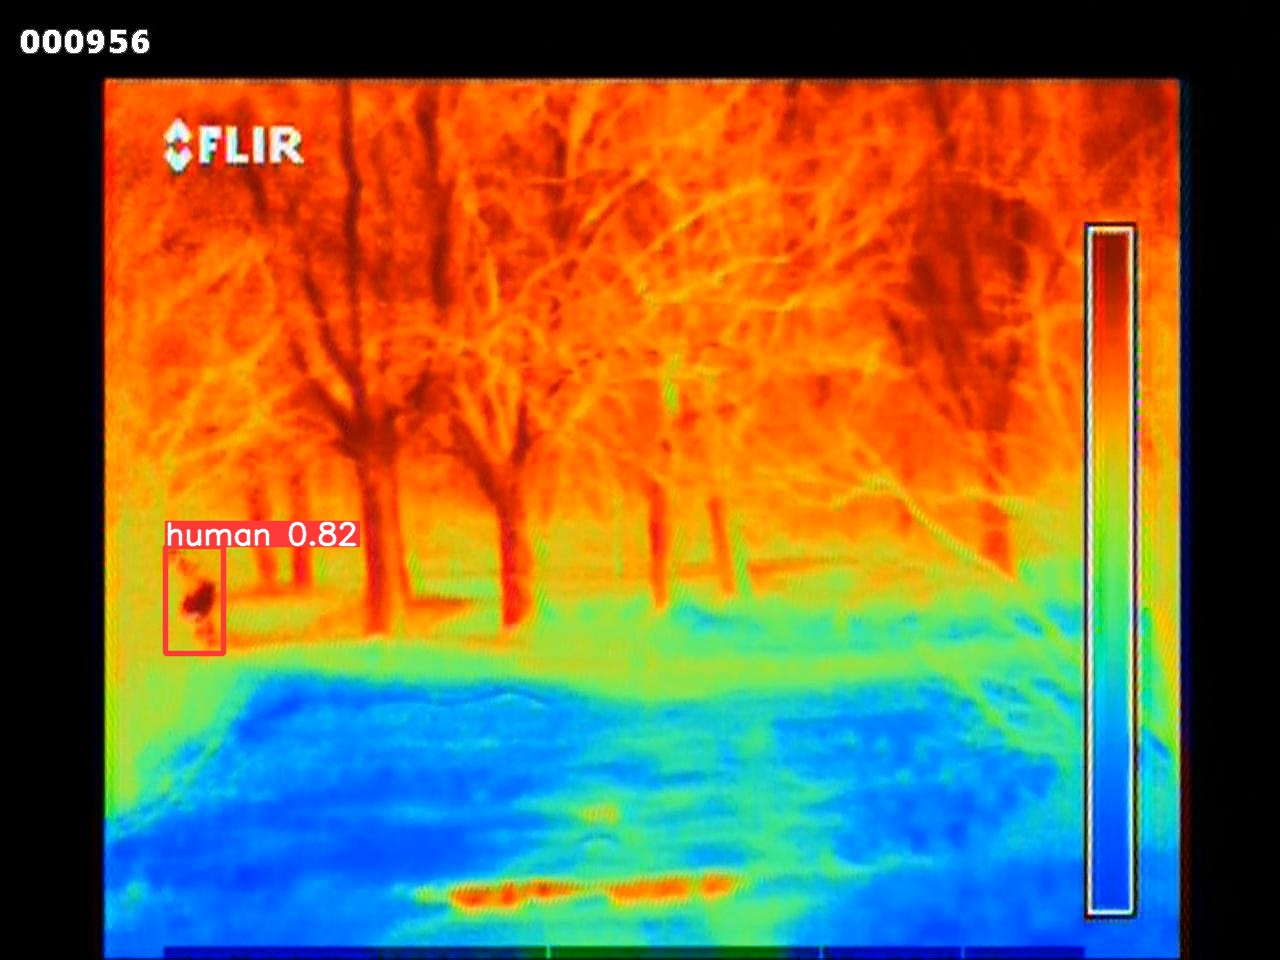

In [ ]:
from IPython.display import Image as IPImage
img_path = "/content/runs/detect/predict/2752.jpg"
IPImage(filename=img_path, width=600)

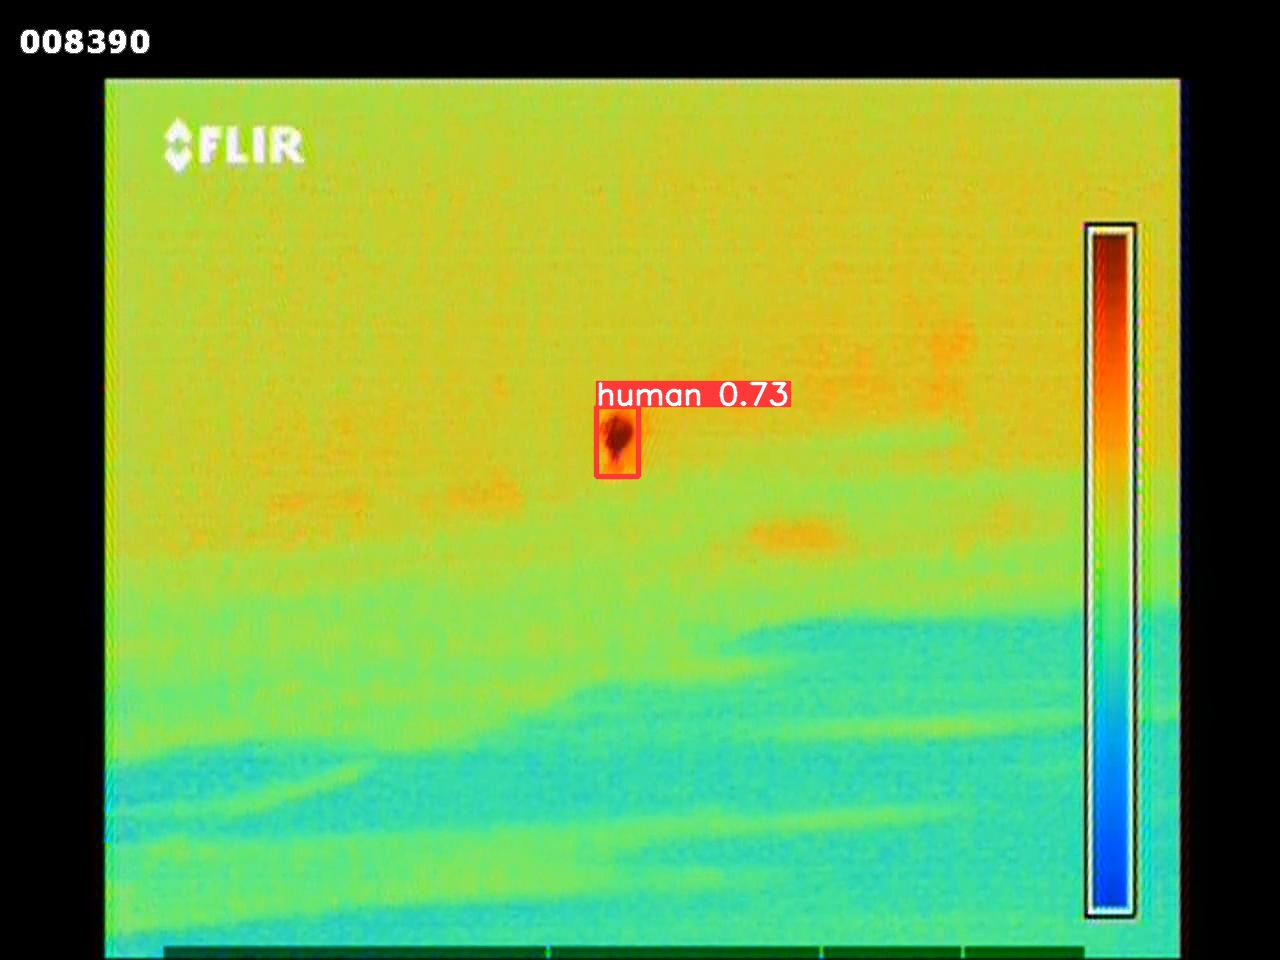

In [ ]:
from IPython.display import Image as IPImage
img_path = "/content/runs/detect/predict/6315.jpg"
IPImage(filename=img_path, width=600)